In [1]:
# imports
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import h5py
import json
import yaml
from PIL import Image
import sys
import os
import glob
import pickle
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

# from jupyterthemes import jtplot
# jtplot.style('onedork')
# %pylab inline

In [2]:
# change directory to data folder
os.chdir('data')

In [31]:
##################################
single_trial = '011520_133257' #c-137
single_trial = '011320_132805' #c-137
single_trial = '011620_135607' #gr5a
single_trial = '011620_135607' #0273


multi_trial = [
    '010320_110046',
    '010620_134501',
    ]

# single_trial = None
multi_trial = None
##################################

In [32]:
# scrap trial sets
#     '112119_112752',
#     '112119_134527',

#     '112219_115341', 
#     '112219_135444',

#     '112519_105926',
#     '112519_132930',
#     '112519_160932',
# '120919_101920',
#     '120919_134003',
#     '120919_162513',
#     '112119_112752',
#     '112119_134527',

#     '112219_115341', 
#     '112219_135444',

#     '112519_105926',
#     '112519_132930',
#     '112519_160932',

In [33]:
figuremode = True # if True, figures made with white background. otherwise darkmode

In [34]:
# graphics parameters

matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Ubuntu-R'],
    })

def custom_colormap_2(color1,color2):
    colors = [color1,color2] 
    cmap_name = 'my_list'
    cmap = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=2)
    return cmap

if figuremode:
    facecolor = 'white'
    activation_color = 'firebrick'
    control_color = 'dimgray'
else:
    facecolor = 'slategray'
    activation_color = 'firebrick'
    control_color = 'dimgray'

markersize = 14

In [35]:
# experiment parameters
arena_radius = 87.0

In [36]:
# DEF include_arena, check if arena parameters match selection criteria for inclusion in analysis
def include_arena(a):
    include=True
    
    #### check classifier type is tunnels ####
#     puzzle=json.loads(a['classifier_type'])
#     if puzzle['type']=='tunnels':
#         include=True
        
    #### make sure object found in at least 1% of arena ####
    threshold = 0.01
    x = a['fly_x']
    y = a['fly_y']
    h = a['region_height']
    w = a['region_width']
    c = a['center']
    roiX1 = c[0]-w/2
    roiX2 = c[0]+w/2
    roiY1 = c[1]-h/2
    roiY2 = c[1]+h/2
    # make residency distribution
    h, xedges, yedges = np.histogram2d(x,y,bins=100,range=[[roiX1,roiX2],[roiY1,roiY2]])
    obj_found = 0
    # count how many bins have at least some residency
    for hrow in h:
        obj_found += len(np.where(hrow>0)[0])
    total = 10000
    if obj_found/total<threshold:
        include=False
        
    #### make sure there aren't many large position jumps, indicating tracking glitch ####
    threshold = 1000 # number of jumps allowed
    dX = np.diff(x)
    dY = np.diff(y)
    dt = 1/a['interpolation'] 
    velX = dX/dt
    velY = dY/dt
    speed = np.power(np.power(velX,2) + np.power(velY,2),0.5)
    jumps = np.where(speed>1000)[0]
    if len(jumps)>threshold:
        include=False
    
    return include

In [57]:
# load relevant arena data into one big dictionary
discard_on = False
print('DISCARD TRIALS?', discard_on)
print('')

d={}
i=0

if single_trial is not None:
    f = single_trial+'.pickle'
    print(f)
    with open(f, 'rb') as handle:
        trial = pickle.load(handle)
    discard = 0 # arenas discarded due to selection criteria
    for a in trial:
        if discard_on==True:
            if include_arena(a)==True:
                d[i]=trial[a]
                i+=1
            else:
                discard+=1
        else:
            d[i]=trial[a]
            i+=1 
    print('discarded arenas:',discard)
    
elif multi_trial is not None:
    for t in multi_trial:
        f = t+'.pickle'
        print(f)
        with open(f, 'rb') as handle:
            trial = pickle.load(handle)
        discard = 0 # arenas discarded due to selection criteria
        for a in trial:
            if discard_on==True:
                if include_arena(a)==True:
                    d[i]=trial[a]
                    i+=1
                else:
                    discard+=1
            else:
                d[i]=trial[a]
                i+=1 
        print('discarded arenas:',discard)
    
else:
    print('SELECT from these files ...')
    for f in glob.glob("*.pickle"):
        print(f)
#         with open(f, 'rb') as handle:
#             trial = pickle.load(handle)
#         for a in range(len(trial)):
#             try:
#                 if include_arena(trial[a])==True:
#                     d[i]=trial[a]
#                     i+=1
#             except:
#                 pass

print('')
print('total arenas: {}'.format(len(d)))

DISCARD TRIALS? False

011620_135607.pickle
dict_keys([11, 12, 13, 16, 17, 18, 21, 22, 23, 26, 27, 28])
discarded arenas: 0

total arenas: 12


In [58]:
d[0].keys()

dict_keys(['fly_x', 'region_width', 'center', 'speed', 'classifier', 'date_time', 'param', 'x', 'arena', 't_total', 'bg_image', 'trial_schedule', 'ball_y', 'elapsed_t', 'led', 'region_height', 'led_policy', 'interpolation', 'object_found', 'led_enabled', 'fly_y', 'radial', 'times', 'classifier_type', 'ball_x', 'all_param', 'y', 'notes', 'fly'])

In [61]:
# get all unique values of key parameters in dataset
fly = {}

for i in d:
    di=d[i]
    fly[i] = di['fly']
    
print('fly:', set(fly.values()))

fly: {'Gr5a'}


<Figure size 432x288 with 0 Axes>

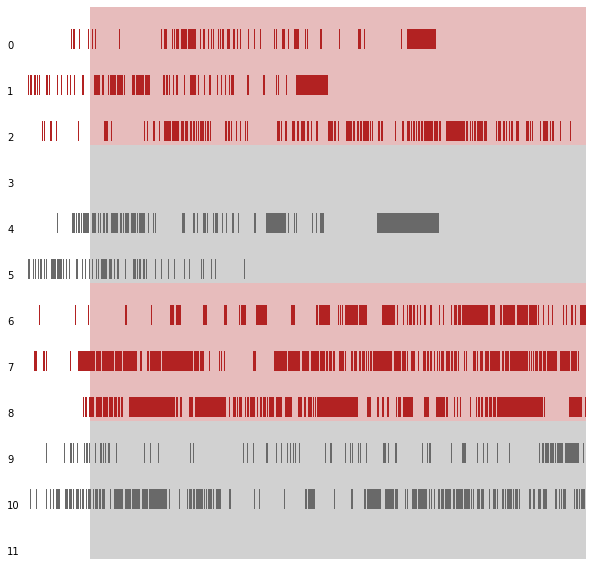

In [62]:
# plot classifier state for each arena
extension=200
def extend_marks(mask,extension=200):
        tunneled = np.where(mask==1)[0]
        for t in tunneled:
            mask[t:t+extension]=1
        return mask

plots=len(d)
fig = plt.figure( )
fig = plt.figure( figsize = (10,10))
fig.patch.set_facecolor(facecolor)
subplot = 0
for i in d:
    subplot += 1
    ax = fig.add_subplot(plots,1,subplot)
    ax.set_facecolor(facecolor)
    color=activation_color
    cmap = custom_colormap_2(facecolor,activation_color)
    if yaml.load(d[i]['led_policy'])['type']=='empty':
        cmap = custom_colormap_2(facecolor,control_color)
        color=control_color
    plot_data = extend_marks(d[i]['classifier'])
    hmap = [plot_data]
    ax.imshow(hmap,cmap=cmap,vmin=0,vmax=1,aspect='auto')
    ax.set_ylim(0,1)
    ax.axis('off')
    # index number on left
    ax.text(-12000,0,str(i),size=10, clip_on=False)
    
    # shade led_enabled (assumes all arenas have same condition)
    led_enabled = np.where(d[0]['led_enabled']==1)[0]
    led_enabled = np.split(led_enabled, np.where(np.diff(led_enabled) != 1)[0]+1)
    for led in led_enabled:
        start, end = led[0], led[-1]
        rect = patches.Rectangle((start,-0.1),(end-start),1.2,linewidth=0,facecolor=color,alpha=0.3,clip_on=False)
        ax.add_patch(rect)
    

<Figure size 432x288 with 0 Axes>

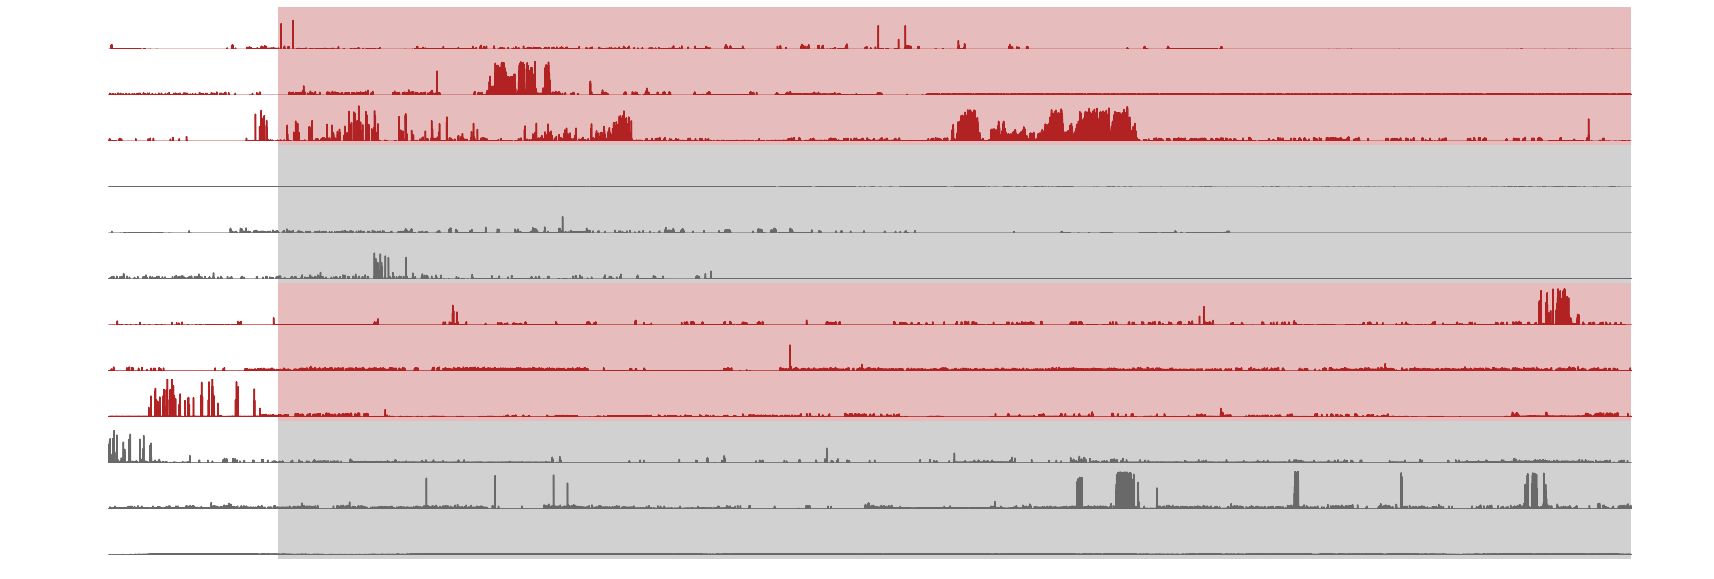

In [63]:
# dot plot of ball moves per minute
move_thresh = 10

plots=len(d)
fig = plt.figure( )
fig = plt.figure( figsize = (30,10))
fig.patch.set_facecolor(facecolor)
subplot = 0
for i in d:
    color=activation_color
    if yaml.load(d[i]['led_policy'])['type']=='empty':
        color=control_color
    subplot += 1
    ax = fig.add_subplot(plots,1,subplot)
    ax.set_facecolor(facecolor)
    x = d[i]['ball_x']
    y = d[i]['ball_y']
    dx = np.diff(x)
    dy = np.diff(y)
    dxy = np.hypot(dx, dy)
    ax.plot(dxy,color=color)
    ax.set_ylim(0,100)
    ax.axis('off')
    
    # shade led_enabled (assumes all arenas have same condition)
    led_enabled = np.where(d[0]['led_enabled']==1)[0]
    led_enabled = np.split(led_enabled, np.where(np.diff(led_enabled) != 1)[0]+1)
    for led in led_enabled:
        start, end = led[0], led[-1]
        rect = patches.Rectangle((start,-10),(end-start),120,linewidth=0,facecolor=color,alpha=0.3,clip_on=False)
        ax.add_patch(rect)

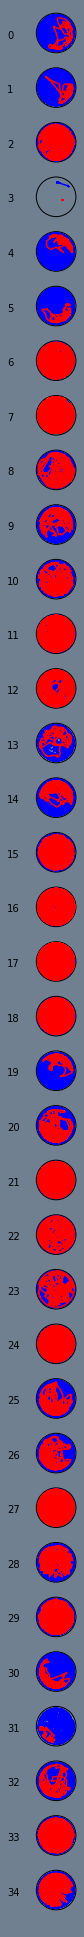

In [21]:
# plot full traces of each arena
plots=len(d)
fig = plt.figure( figsize = (12,plots))
fig.patch.set_facecolor(facecolor)
subplot = 0
for i in d:
    subplot += 1
    ax = fig.add_subplot(plots,1,subplot, aspect='equal')
    ax.set_facecolor(facecolor)
    h = d[i]['region_height']
    w = d[i]['region_width']
    arena = plt.Circle((w/2.0,h/2.0),arena_radius, color='k', linewidth=1, fill=False, clip_on=False)
    ax.add_artist(arena)
    x = d[i]['fly_x']
    y = d[i]['fly_y']
    ax.plot(x,y,'b')
    x = d[i]['ball_x']
    y = d[i]['ball_y']
    ax.plot(x,y,'r')
 
    ax.set_xlim(0,w)
    ax.set_ylim(0,h)
#     ax.invert_yaxis()
    ax.axis('off')
    # index number on left
    ax.text(-120,h/2.5,str(i),size=10, clip_on=False)
    # arena number on right
#     ax.text(roiX2+30,c[1]+10,str(d[i]['arena']),size=10, clip_on=False)


In [12]:
def PLOT_dotplot(plots, labels, ylim, yticks, x_title, y_title, figsize=(5,5),showmean=True,showmedian=False):
    
    fig, ax = plt.subplots(1,figsize = figsize)
    fig.patch.set_facecolor(facecolor)
    ax.set_facecolor(facecolor)
    markersize = figsize[0]*4
    fontsize = figsize[0]
    markersize = min(figsize)*10
    fontsize = min(figsize)*2
    def scatter_dotplot(x_pos,y,scatter=0.1):
        x=[]
        for y_point in y:
            x.append(np.random.normal([x_pos], scatter)[0]) # determines jitter in scatter
        return x,y
    
    positions=[]
    pos=1
    pos_inc = 1.0
    for p in plots:
        positions.append(pos)
        p_mean = np.mean(p)
        p_median = np.median(p)
        if showmean:
            ax.plot([pos-pos_inc/3,pos+pos_inc/3],[p_mean,p_mean],'k')
        if showmedian:
            ax.plot([pos-pos_inc/3,pos+pos_inc/3],[p_median,p_median],'k')
        x,y = scatter_dotplot(pos,p)
        x = np.array(x)
        ax.scatter(x,y,marker='o', s=markersize, linewidth=0.1,clip_on=False, edgecolors = activation_color, facecolors=activation_color, alpha = 0.8)
        pos+=pos_inc

    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)
    if ylim:
        ax.set_ylim(ylim)
        ax.set_yticks(yticks)
    ax.tick_params(labelsize=fontsize)
    ax.set_xlabel(x_title, fontweight='bold',fontsize=fontsize)
    ax.set_ylabel(y_title, fontweight='bold',fontsize=fontsize)

In [13]:
# PLOT avg distance traveled per minute

labels = []
dists = {}
for i in d:
    di=d[i]
    arena = di['arena']
    dists[arena]=[]
    labels.append(arena)
for i in d:
    di=d[i]
    arena = di['arena']
    x=di['x']
    y=di['y']
    # calculate total distance covered
    Xdiff = np.diff(x)
    Ydiff = np.diff(y)
    dist = np.sum(np.hypot(Xdiff, Ydiff))
    # calucalte distance per minute
    total_minutes = di['t_total']/60.0
    dist = dist/total_minutes
    dists[arena].append(dist)

plots=[]
for a in dists:
    plots.append(dists[a])
labels = np.arange(1,36,1)
ylim = None
yticks = None
x_title = 'arena'
y_title = 'mm traveled / minute'
PLOT_dotplot(plots, labels, ylim, yticks, x_title, y_title, figsize=(24,8))

ValueError: diff requires input that is at least one dimensional

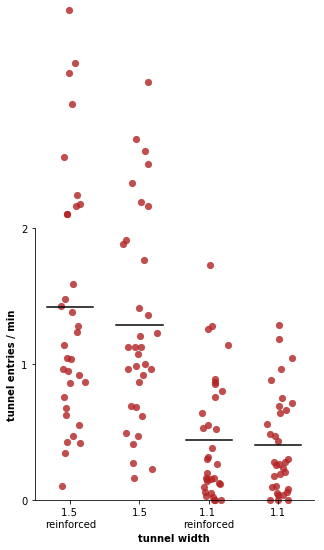

In [79]:
# PLOT avg number of entries per minute, for each type of tunnel
WR = [] # wide, reinforced
W = [] # wide
NR = [] # narrow, reinforced
N = [] # narrow
wide_width = d[0]['TR']
narrow_width = d[0]['BR']
for i in d:
    di = d[i]
    center = di['center']
    radial = di['radial']
    x = di['x']
    y = di['y']
    radius = di['param']['radius']
    outer_radius = di['param']['outer_radius']
    BL, BR, TL, TR = grab_entries_traversals(center,radial,x,y,radius,outer_radius)
    # count number of entries
    TR_entries = (len(TR['starts']))
    BL_entries = (len(BL['starts']))
    BR_entries = (len(BR['starts']))
    TL_entries = (len(TL['starts']))
    # calucalte entries per minute
    total_minutes = di['t_total']/60.0
    TR_epm = TR_entries/total_minutes
    BL_epm = BL_entries/total_minutes
    BR_epm = BR_entries/total_minutes
    TL_epm = TL_entries/total_minutes

    WR.append(TR_epm)
    W.append(BL_epm)
    NR.append(BR_epm)
    N.append(TL_epm)

plots = [WR,W,NR,N]
labels = [str(wide_width)+' \nreinforced',str(wide_width),str(narrow_width)+' \nreinforced',str(narrow_width)]
ylim = (0,2)
yticks = [0,1,2]
x_title = 'tunnel width'
y_title = 'tunnel entries / min'
PLOT_dotplot(plots, labels, ylim, yticks, x_title, y_title, figsize=(5,5))


/home/flyranch-corfas3/.virtualenvs/jupyter_nosys/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


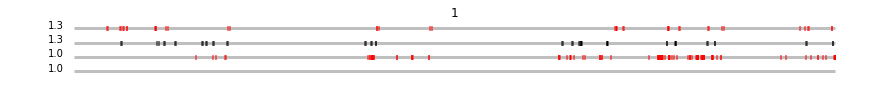

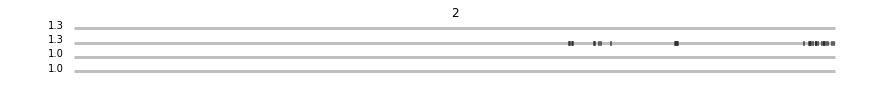

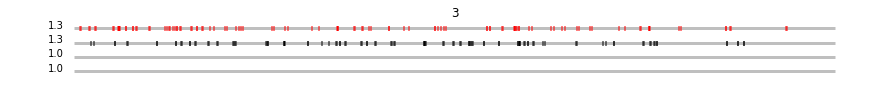

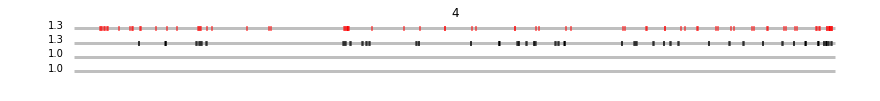

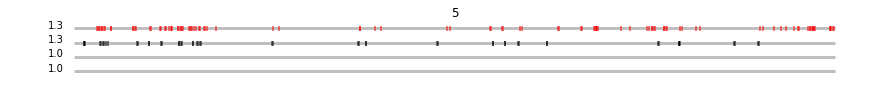

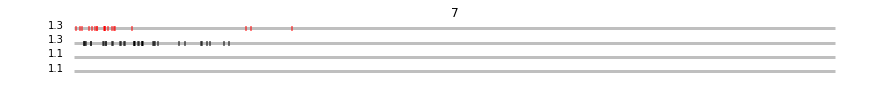

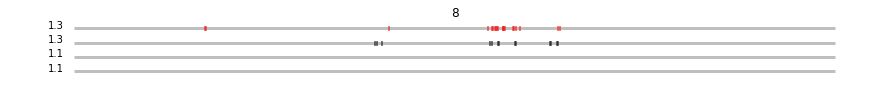

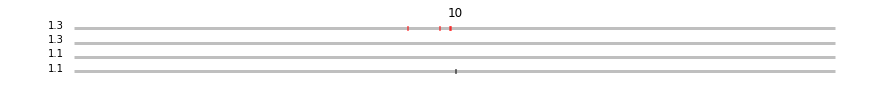

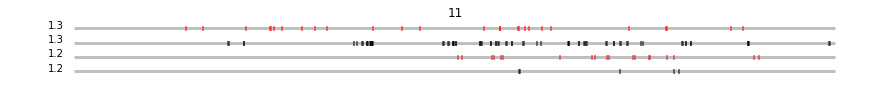

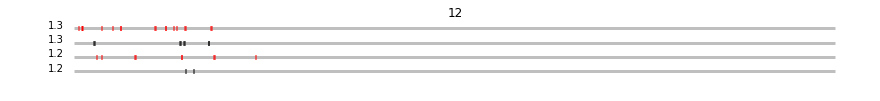

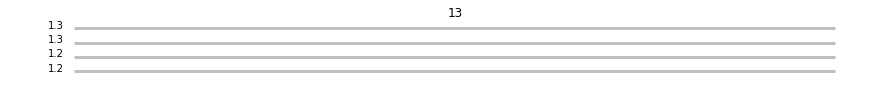

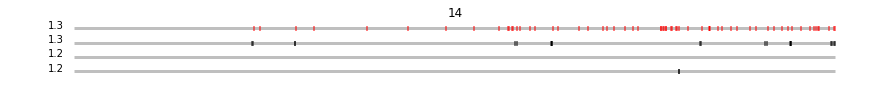

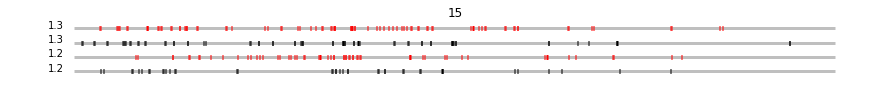

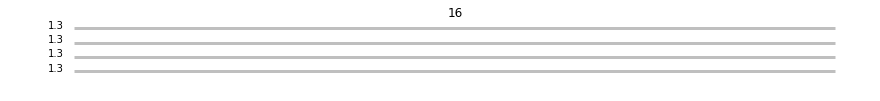

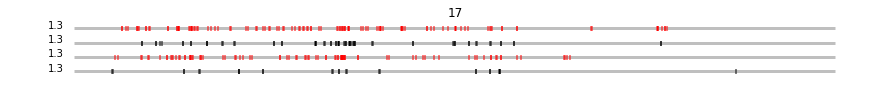

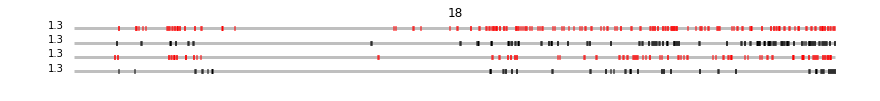

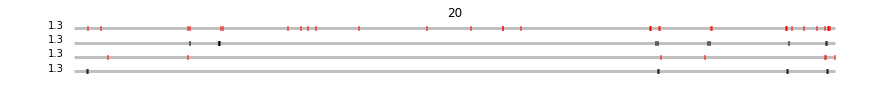

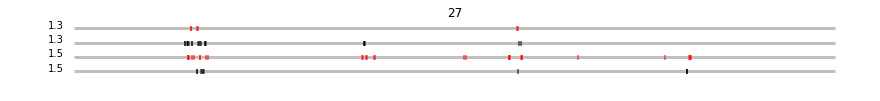

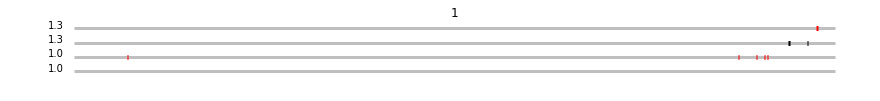

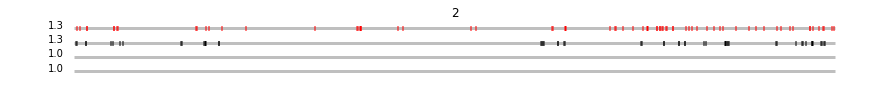

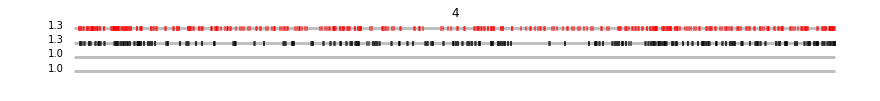

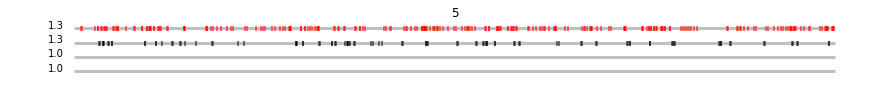

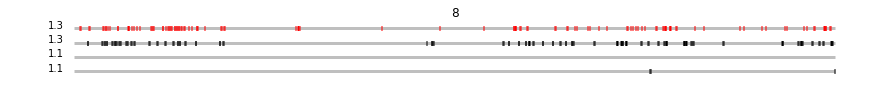

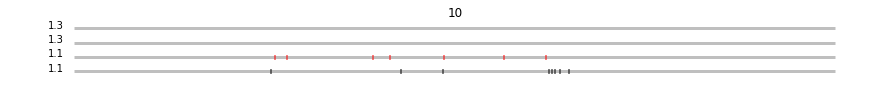

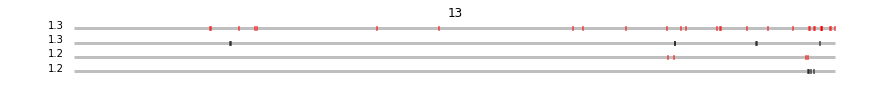

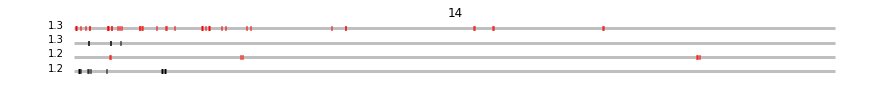

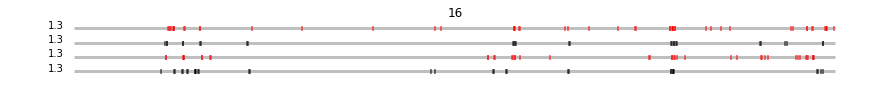

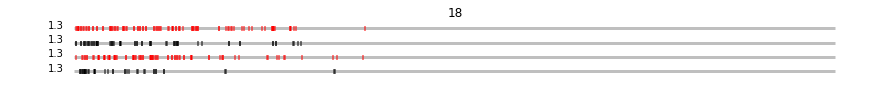

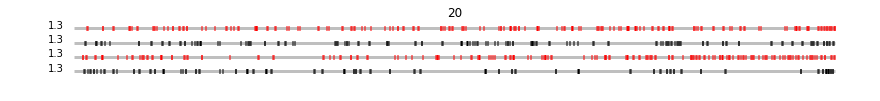

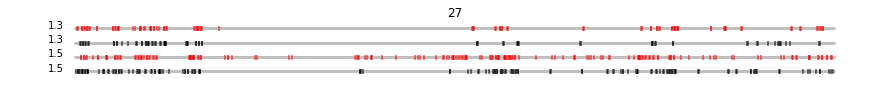

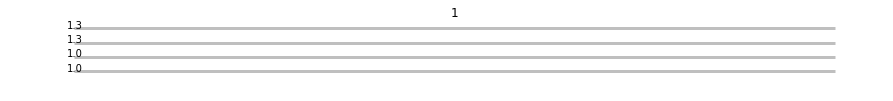

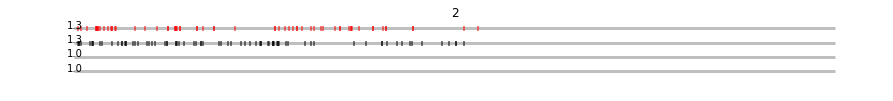

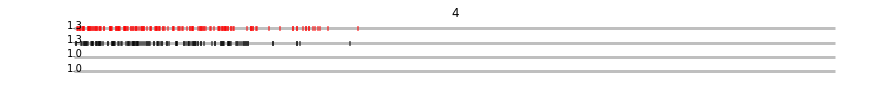

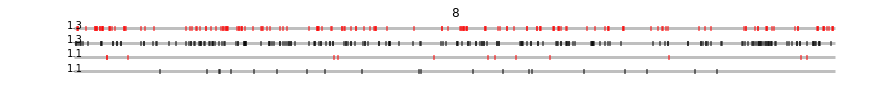

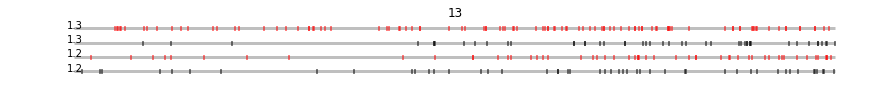

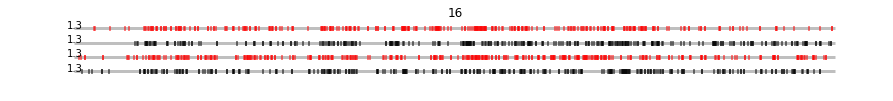

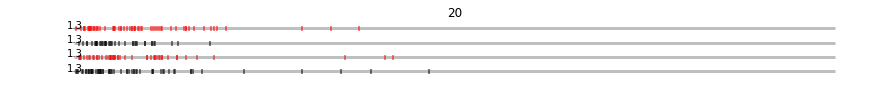

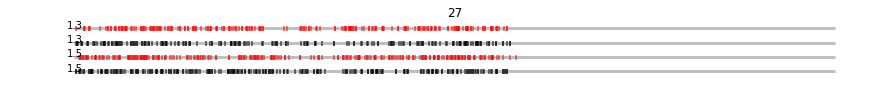

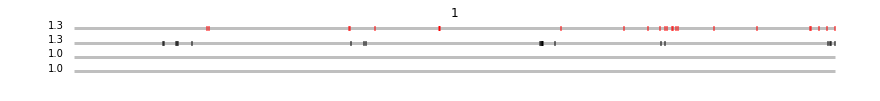

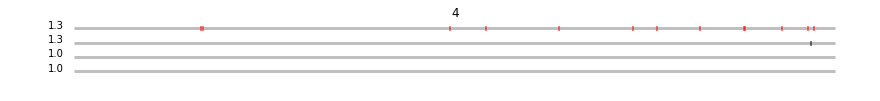

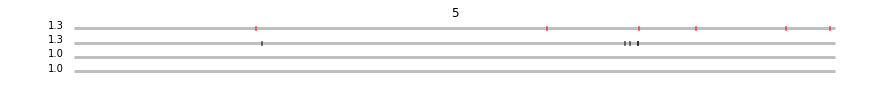

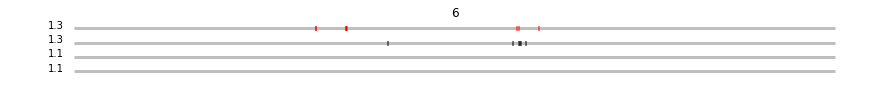

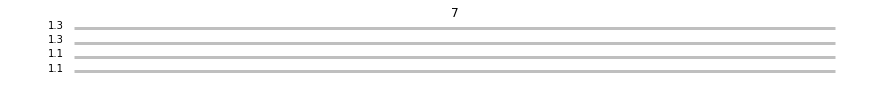

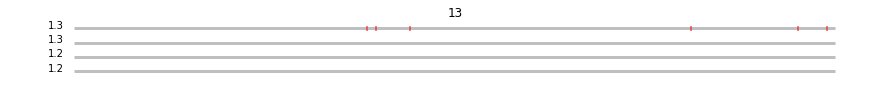

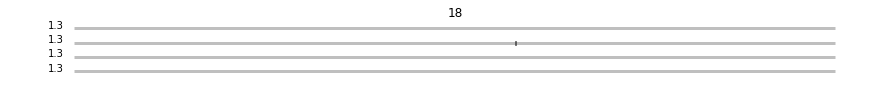

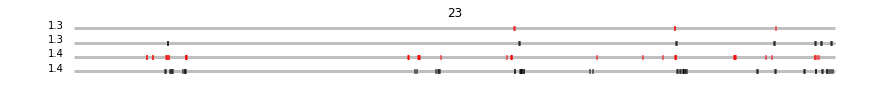

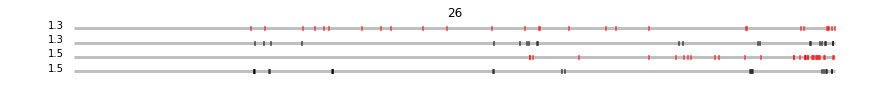

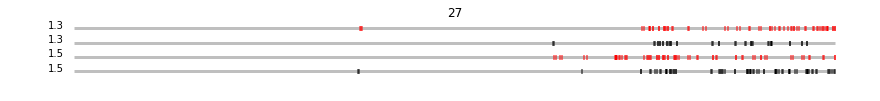

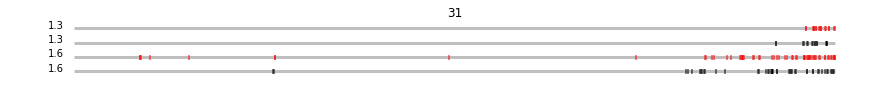

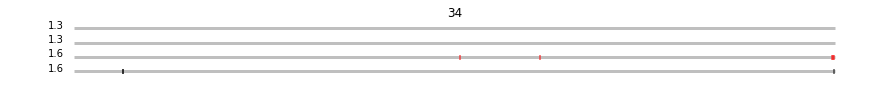

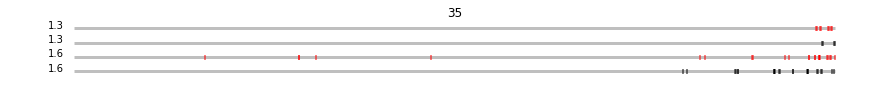

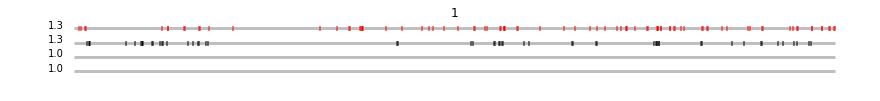

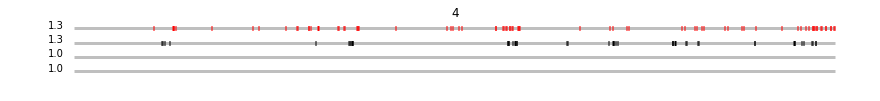

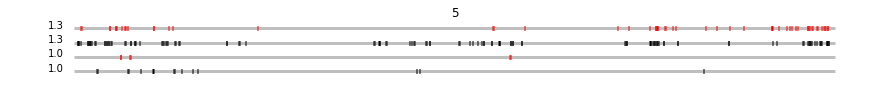

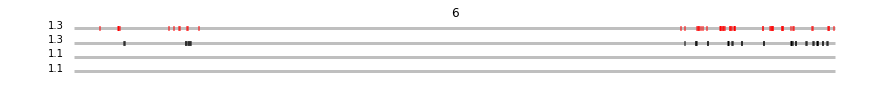

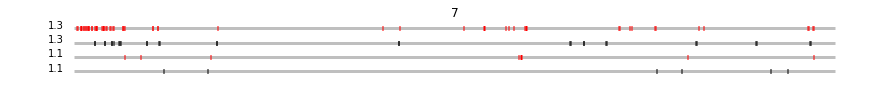

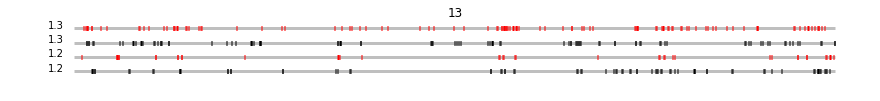

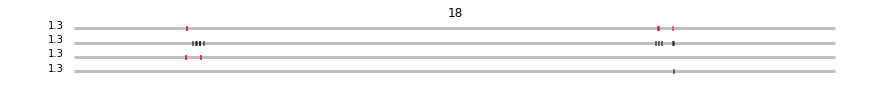

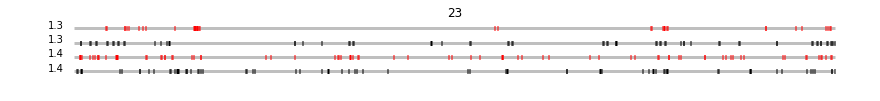

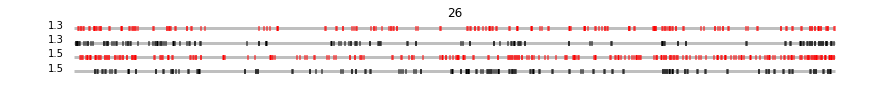

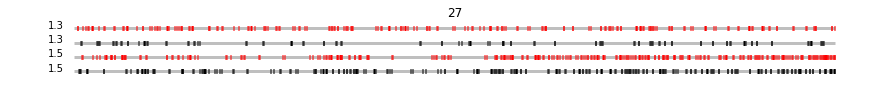

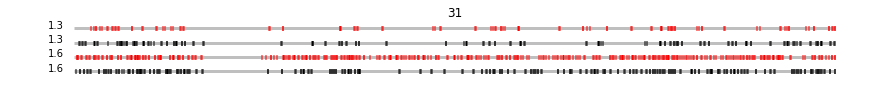

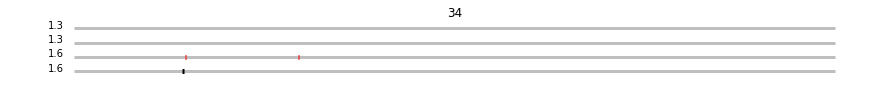

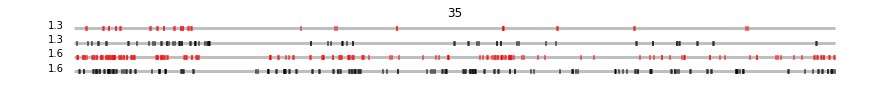

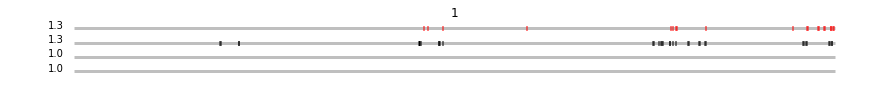

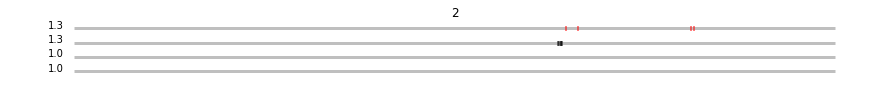

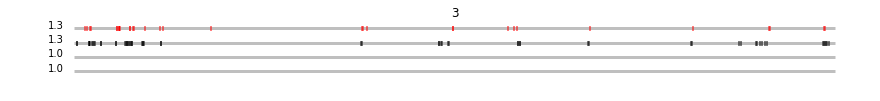

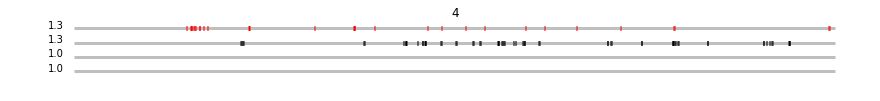

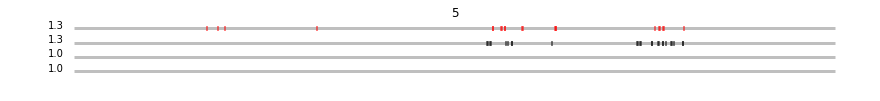

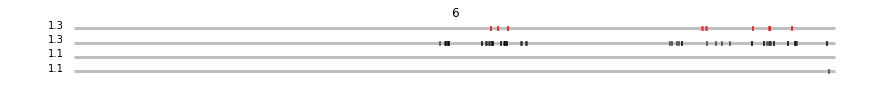

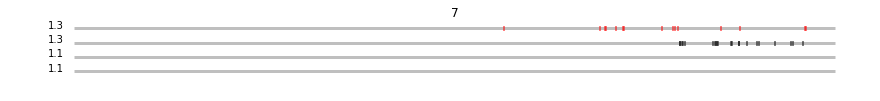

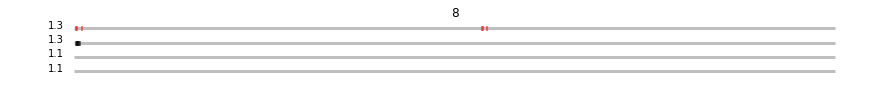

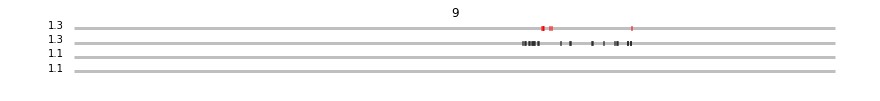

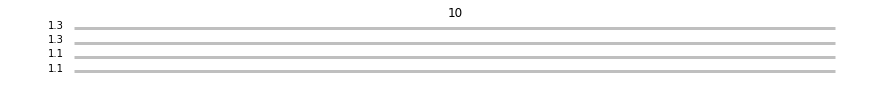

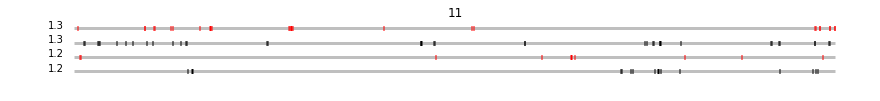

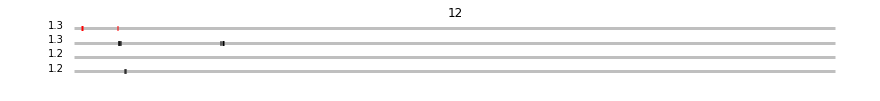

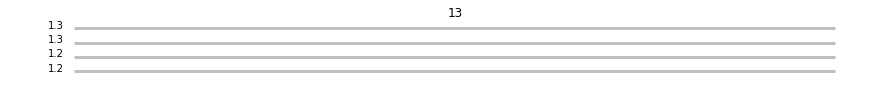

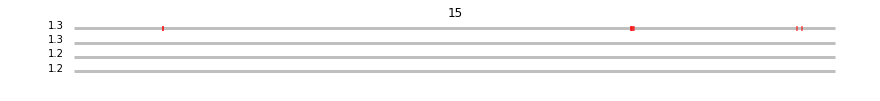

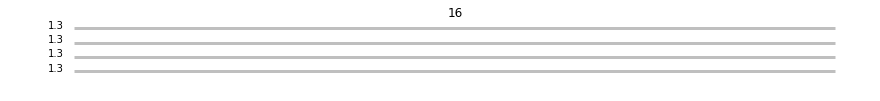

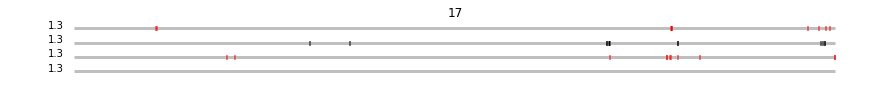

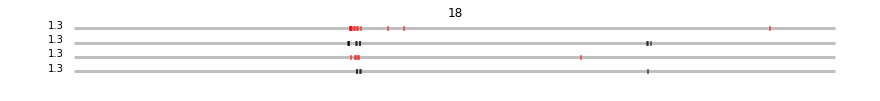

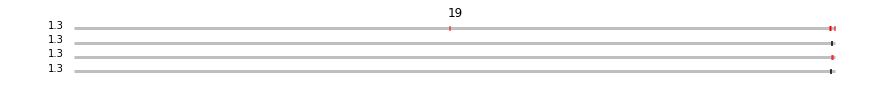

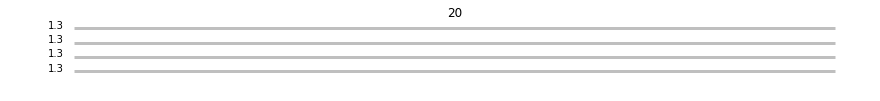

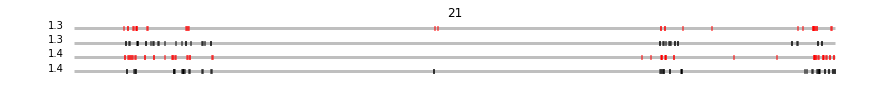

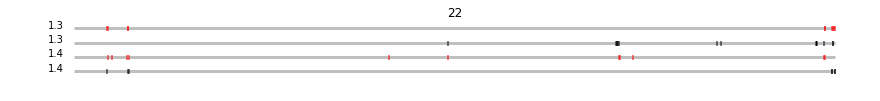

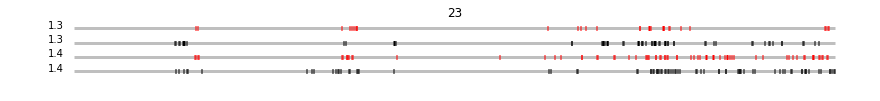

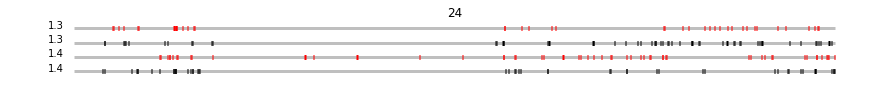

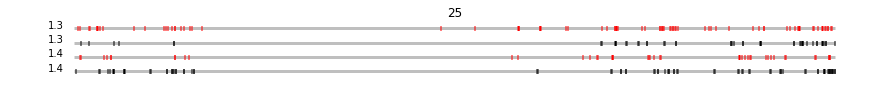

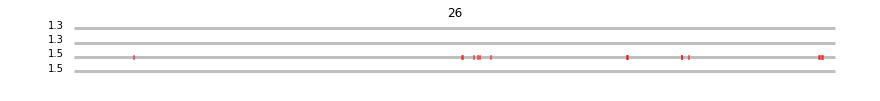

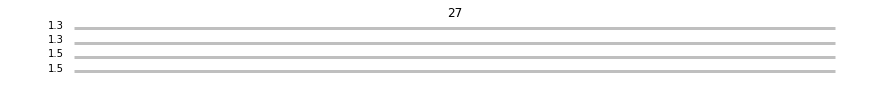

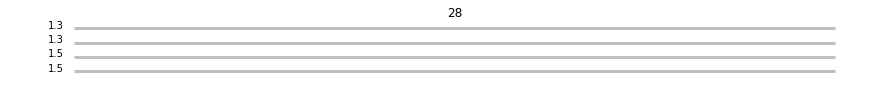

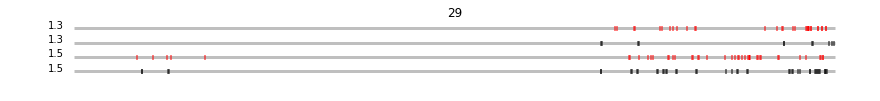

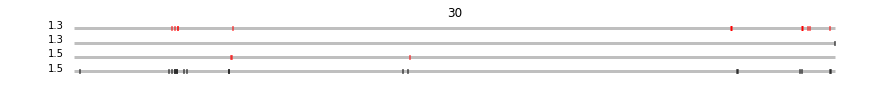

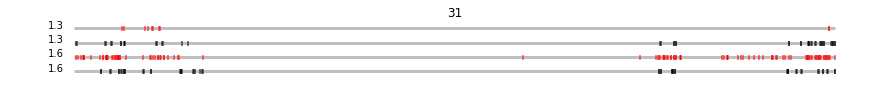

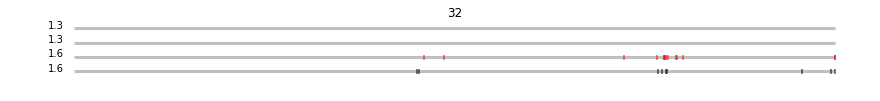

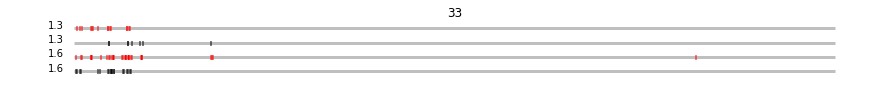

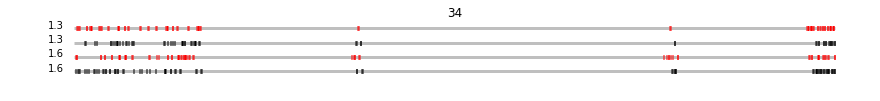

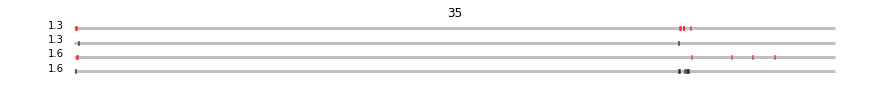

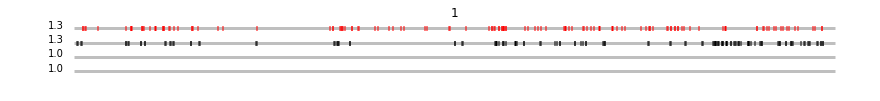

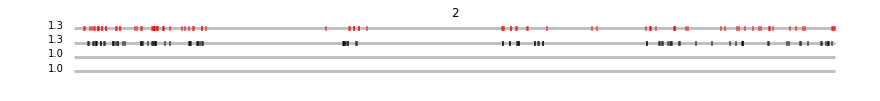

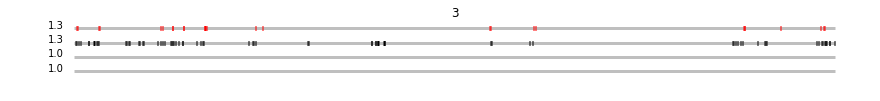

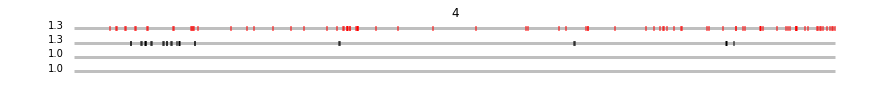

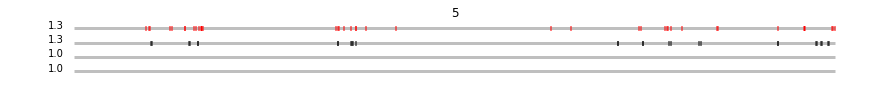

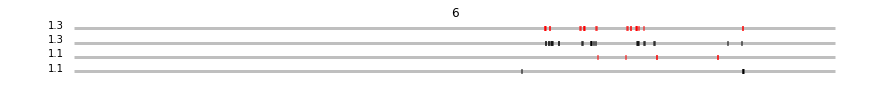

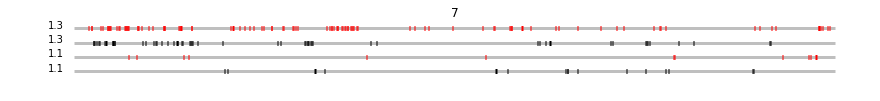

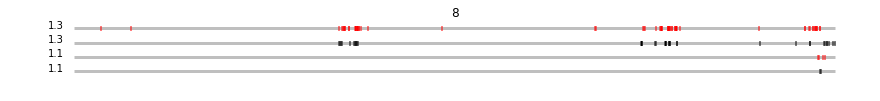

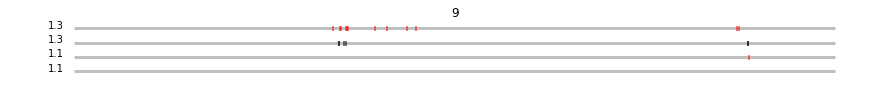

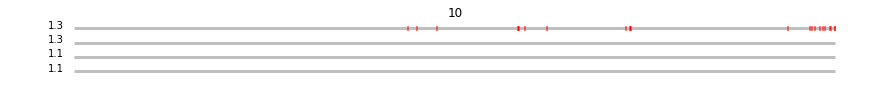

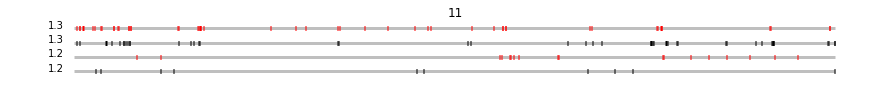

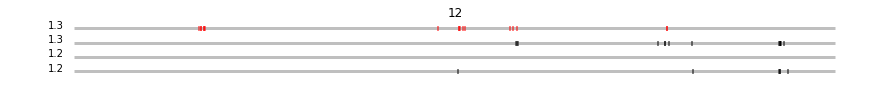

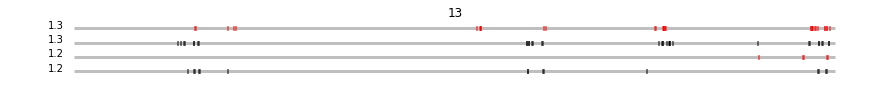

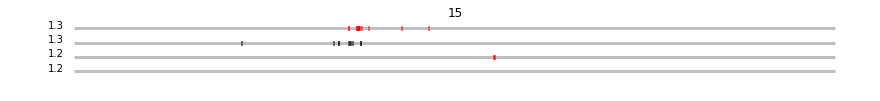

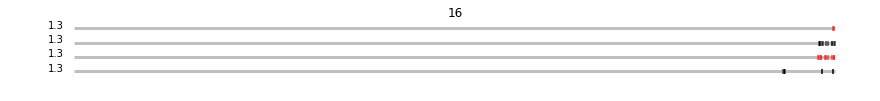

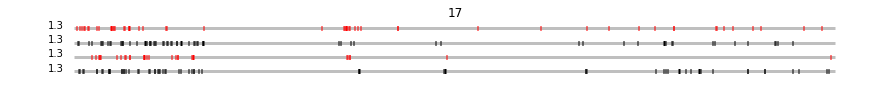

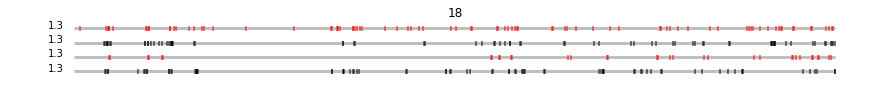

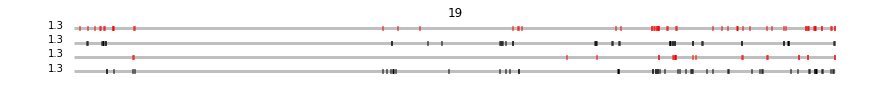

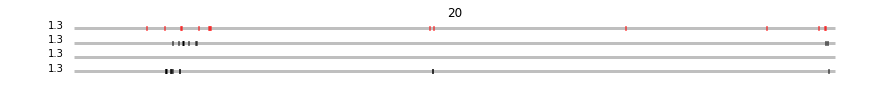

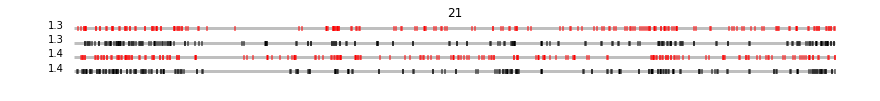

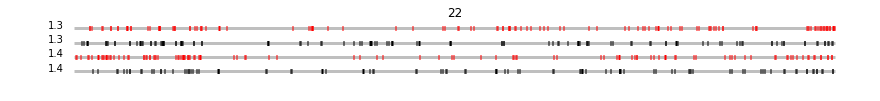

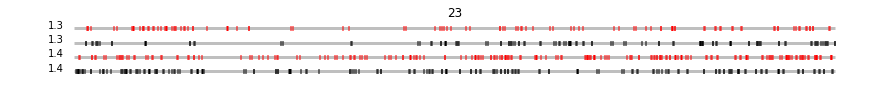

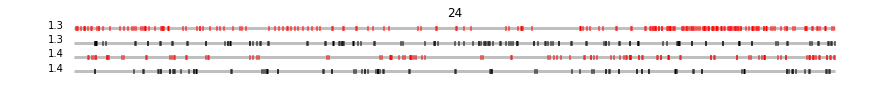

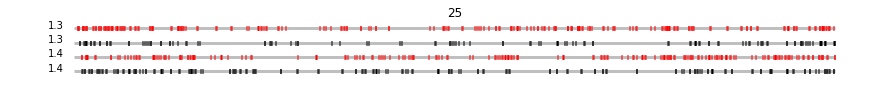

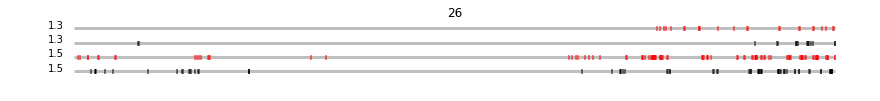

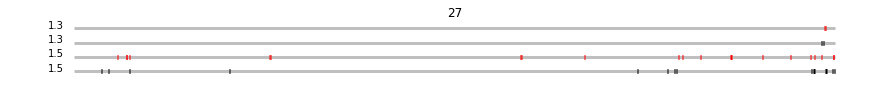

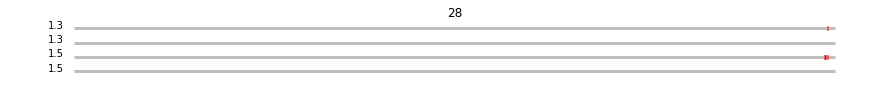

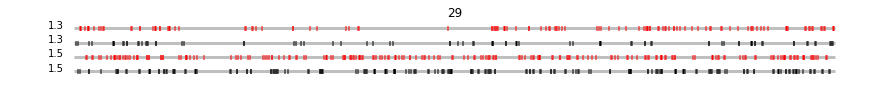

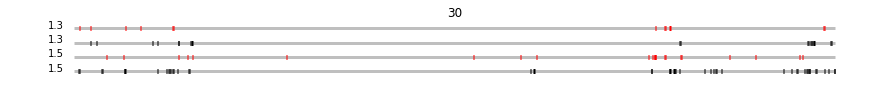

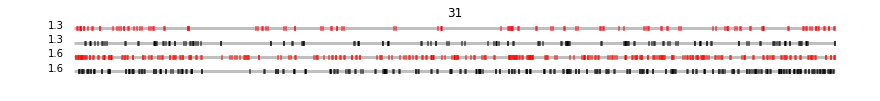

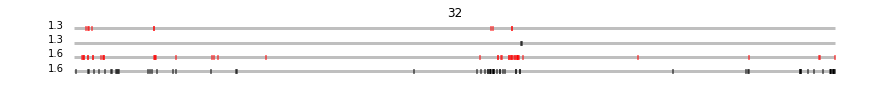

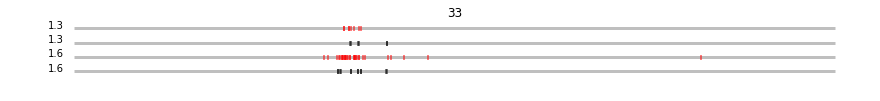

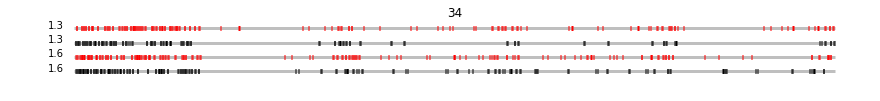

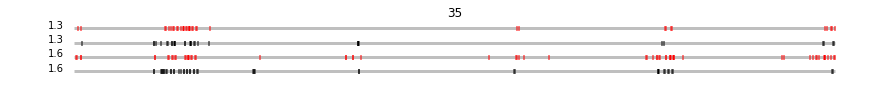

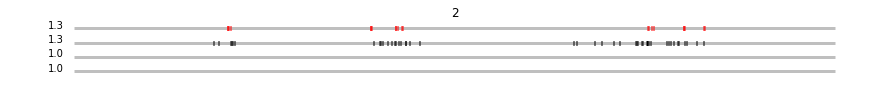

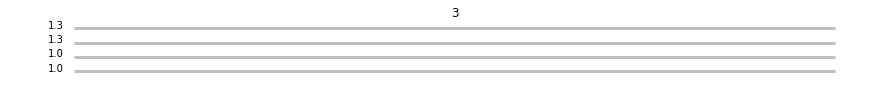

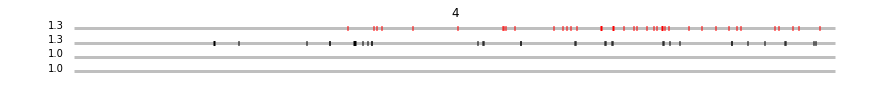

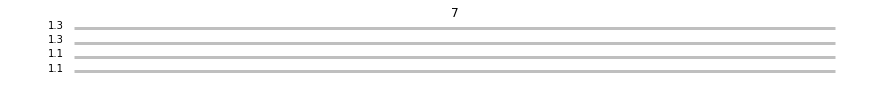

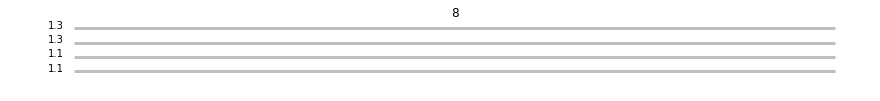

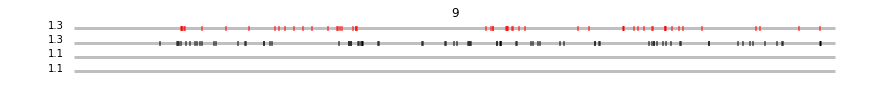

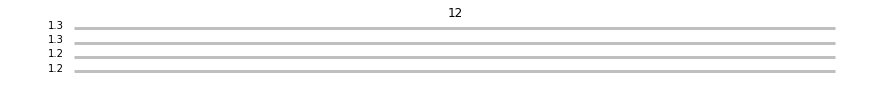

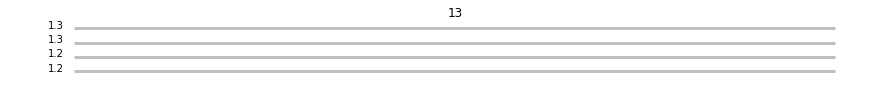

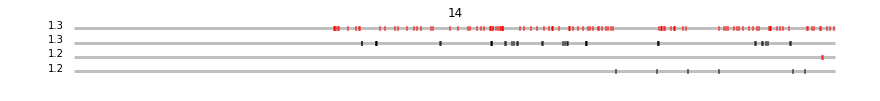

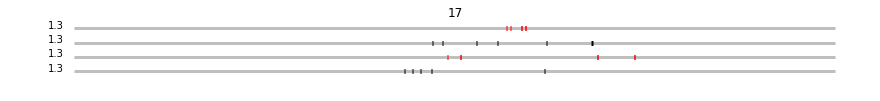

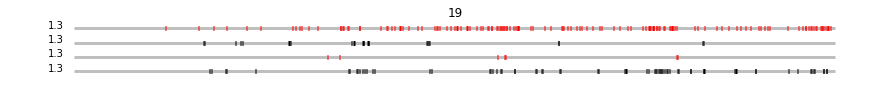

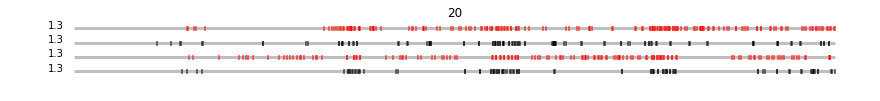

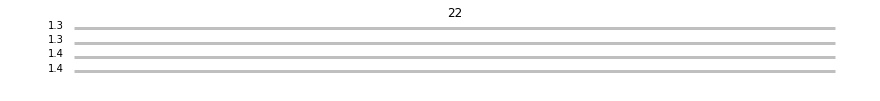

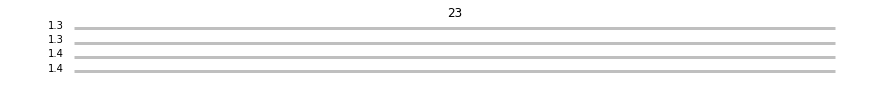

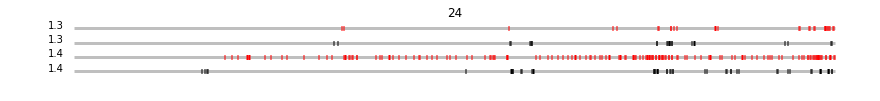

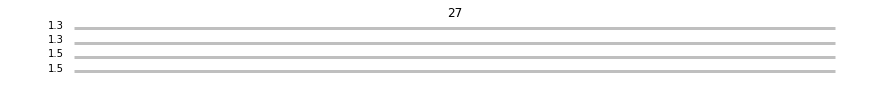

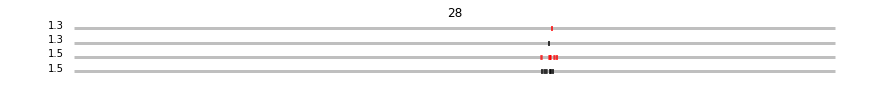

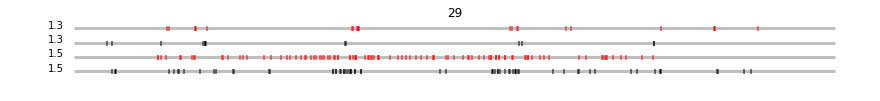

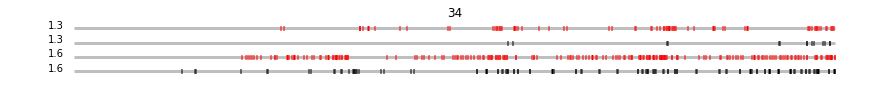

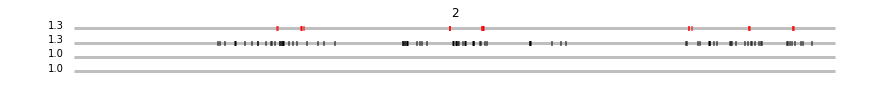

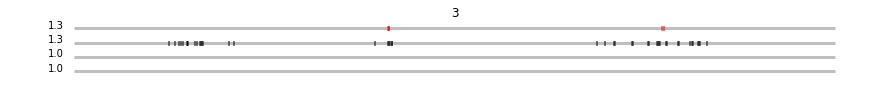

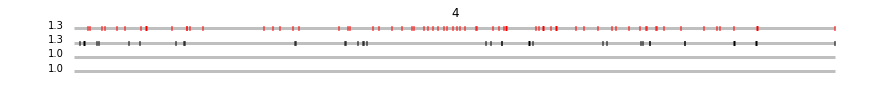

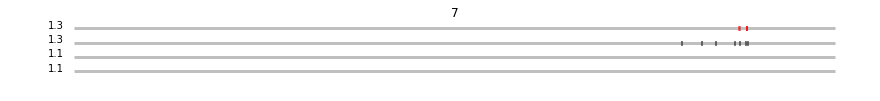

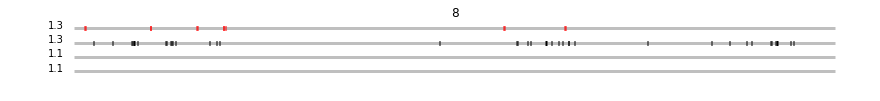

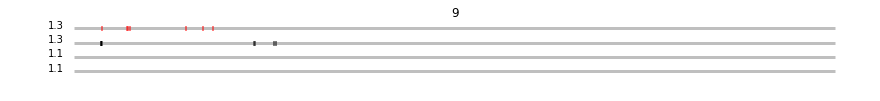

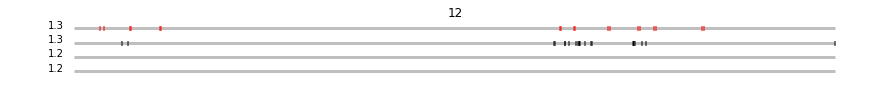

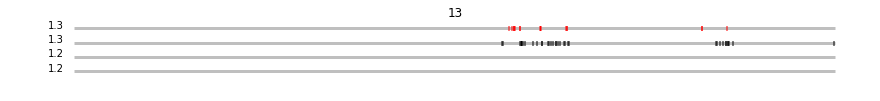

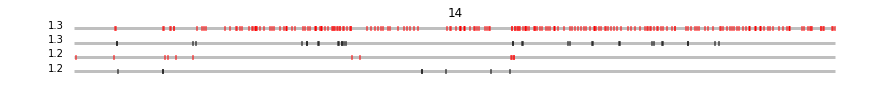

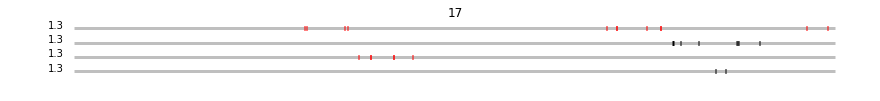

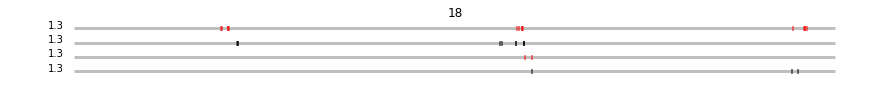

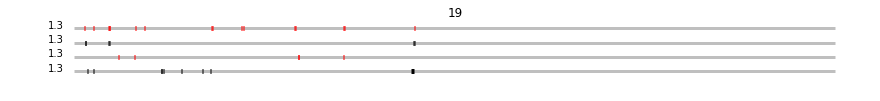

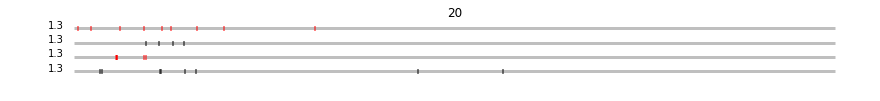

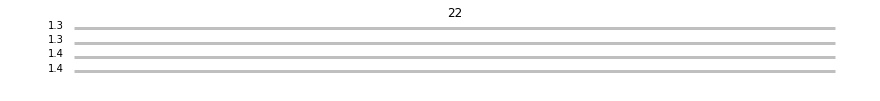

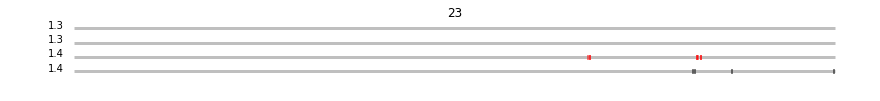

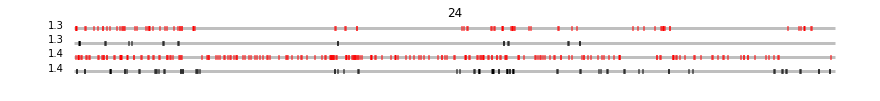

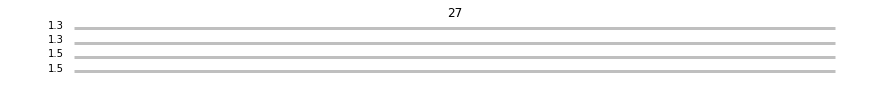

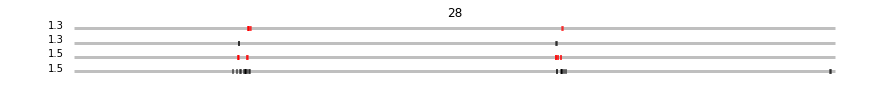

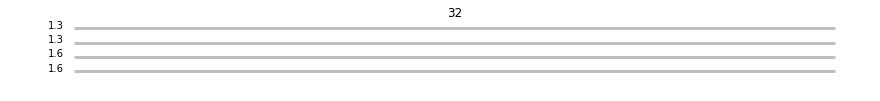

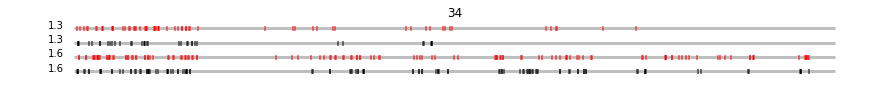

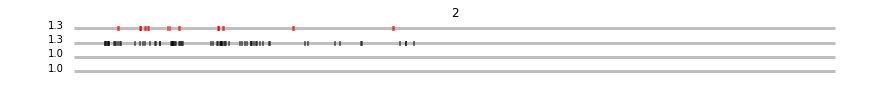

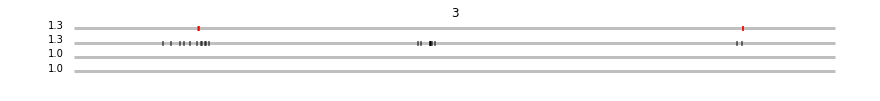

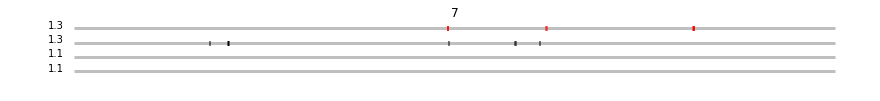

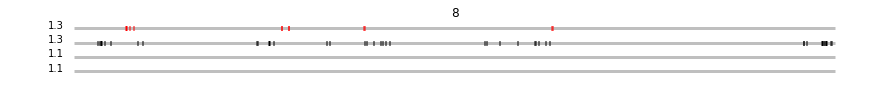

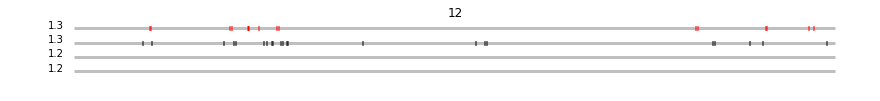

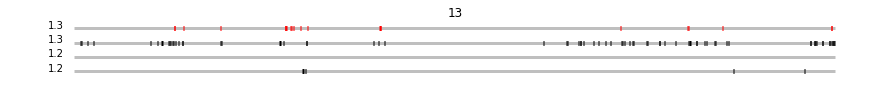

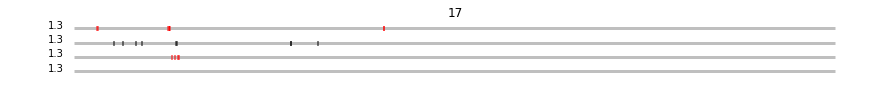

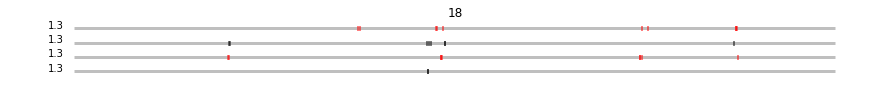

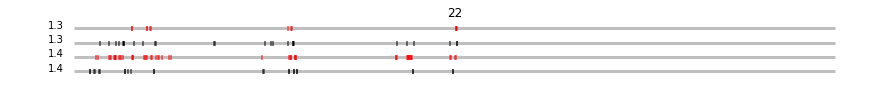

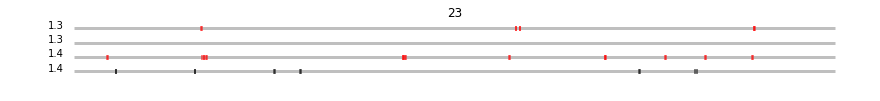

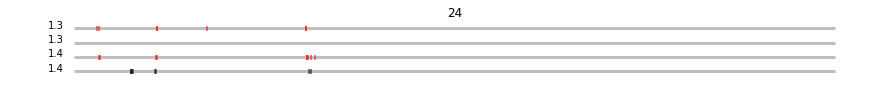

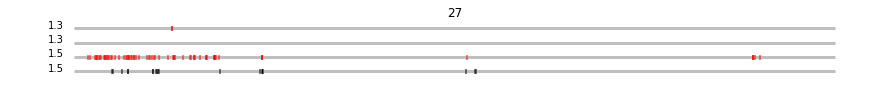

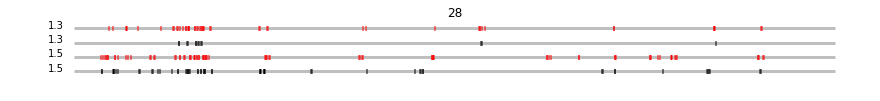

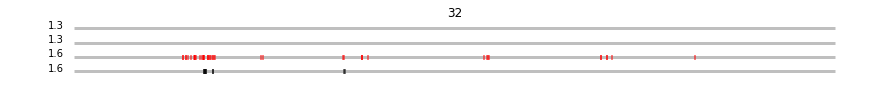

In [23]:
# PLOT States

for i in d:
    di = d[i]
    center = di['center']
    cx = center[0]
    cy = center[1]
    radial = di['radial']
    x = di['x']
    y = di['y']
    radius = di['param']['radius']
    outer_radius = di['param']['outer_radius']

    BL, BR, TL, TR = grab_tunnel_states(center,radial,x,y,radius,outer_radius)
    states = np.where(BL==1)[0]

    BL, BR, TL, TR = grab_entries_traversals(center,radial,x,y,radius,outer_radius)
    traversals = [BL, BR, TL, TR]
    reinforced = [False, True, False, True]
    axis = [1, 2, 3, 0]

    # print(states)
    # print(traversals)
    fig, ax = plt.subplots(4,figsize = (15,1))
#     ax.scatter(states,np.ones(len(states)),s=2,c='k')
    extension=200
    for traversal, reinf, axnum in zip(traversals,reinforced,axis):
        ax[axnum].plot([0,len(radial)],[1,1],'grey',linewidth=3,alpha=0.5,solid_capstyle="butt")
        ax[axnum].axis('off')
        color = 'k'
        if reinf:
            color='r'
        for start, end in zip(traversal['starts'],traversal['ends']):
            ax[axnum].plot([start,start+extension],[1,1],color=color,linewidth=5,solid_capstyle="butt")
    
    # annotate tunnel width
    width = str(d[i]['TR'])
    ax[0].text(-5000,1,width) 
    ax[1].text(-5000,1,width) 
    width = str(d[i]['BR'])
    ax[2].text(-5000,1,width)
    ax[3].text(-5000,1,width)
    ax[0].set_title(di['arena'])
    


/home/flyranch-corfas3/.virtualenvs/jupyter_nosys/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


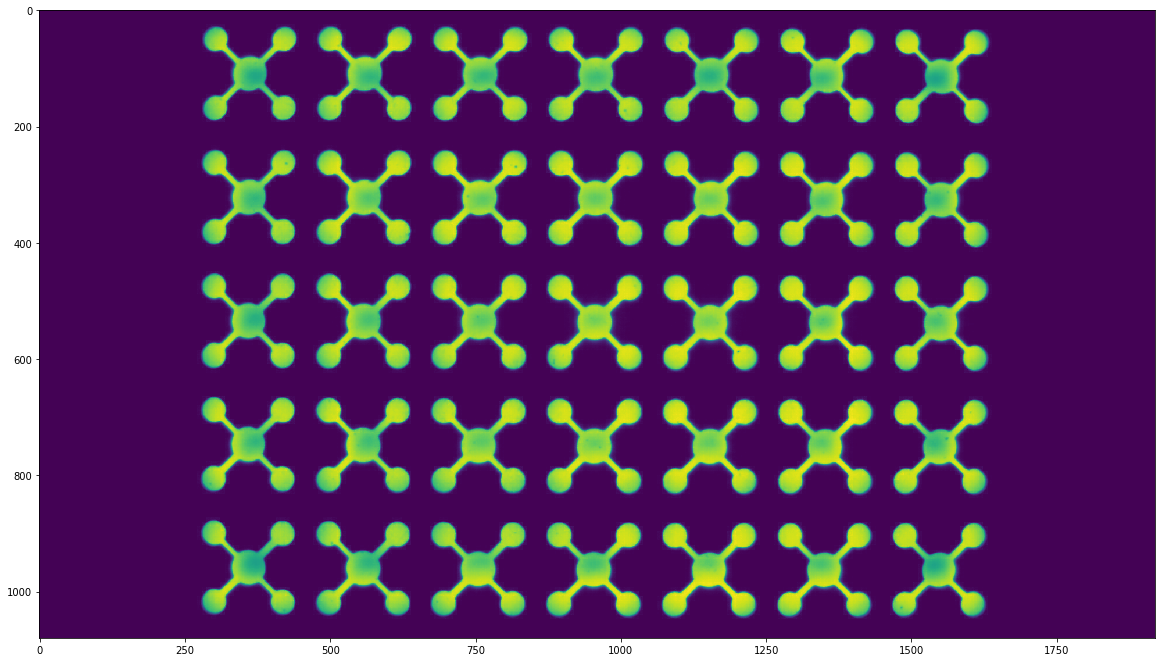

In [15]:
fig = plt.figure( figsize = (20,20))
plt.imshow(d[0]['bg_image'])

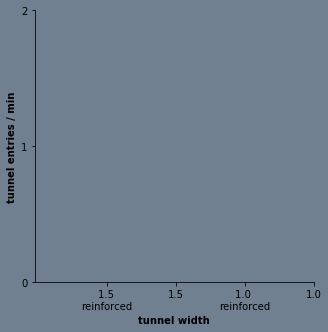

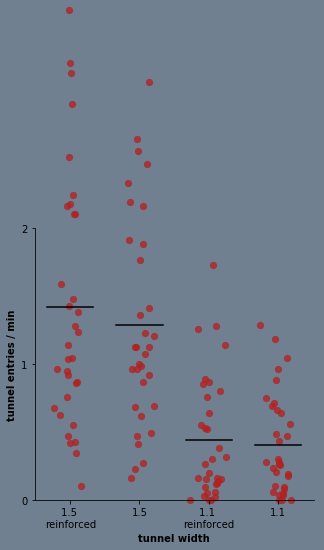

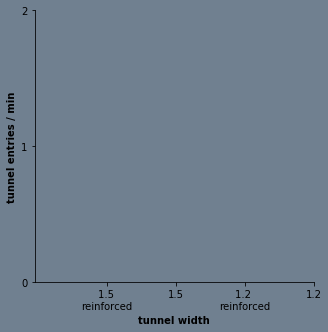

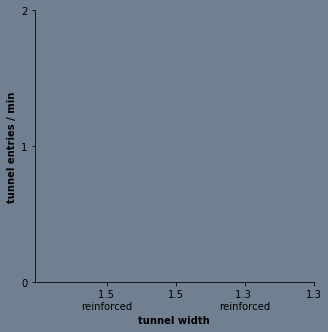

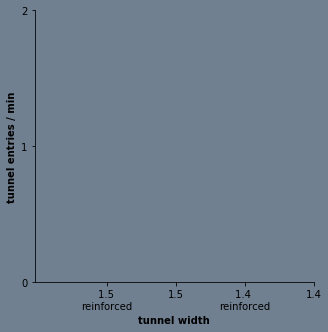

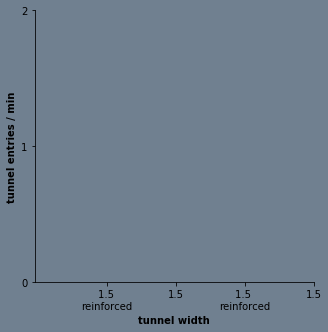

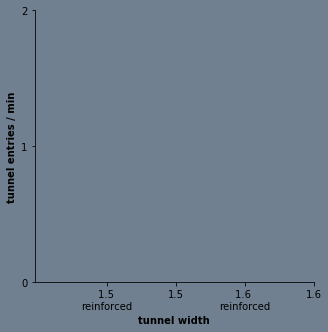

In [66]:
# PLOT avg number of entries per minute, for each type of tunnel

test_widths = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
standard_width = d[0]['TR']

for test_width in test_widths:

    WR = [] # wide, reinforced
    W = [] # wide
    NR = [] # narrow, reinforced
    N = [] # narrow

    for i in d:
        di = d[i]
        if di['BR']==test_width: # only analyze arenas with tunnel of test_width
            center = di['center']
            radial = di['radial']
            x = di['x']
            y = di['y']
            radius = di['param']['radius']
            outer_radius = di['param']['outer_radius']
            BL, BR, TL, TR = grab_entries_traversals(center,radial,x,y,radius,outer_radius)
            # count number of entries
            TR_entries = (len(TR['starts']))
            BL_entries = (len(BL['starts']))
            BR_entries = (len(BR['starts']))
            TL_entries = (len(TL['starts']))
            # calucalte entries per minute
            total_minutes = di['t_total']/60.0
            TR_epm = TR_entries/total_minutes
            BL_epm = BL_entries/total_minutes
            BR_epm = BR_entries/total_minutes
            TL_epm = TL_entries/total_minutes

            WR.append(TR_epm)
            W.append(BL_epm)
            NR.append(BR_epm)
            N.append(TL_epm)

    plots = [WR,W,NR,N]
    labels = [str(standard_width)+' \nreinforced',str(standard_width),str(test_width)+' \nreinforced',str(test_width)]
    ylim = (0,2)
    yticks = [0,1,2]
    x_title = 'tunnel width'
    y_title = 'tunnel entries / min'
    PLOT_dotplot(plots, labels, ylim, yticks, x_title, y_title, figsize=(5,5))


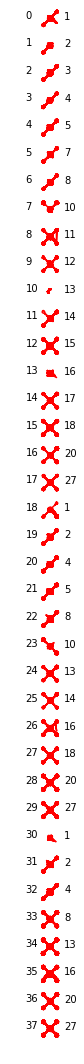

In [142]:
# PLOT all trajectories
plots=len(d)
fig = plt.figure( figsize = (6,plots/2))
subplot = 0
for i in d:
    subplot += 1
    ax = fig.add_subplot(plots,1,subplot, aspect='equal')
    h = d[i]['region_height']
    w = d[i]['region_width']
    c = d[i]['center']
    roiX1 = c[0]-w/2
    roiX2 = c[0]+w/2
    roiY1 = c[1]+h/2
    roiY2 = c[1]-h/2
#     arena = plt.Circle((c[0],c[1]),17, color='k', linewidth=0.5, fill=False, clip_on=False)
#     ax.add_artist(arena)
    ax.plot(d[i]['x'],d[i]['y'],'r')
    plt.xlim(roiX1,roiX2)
    plt.ylim(roiY1,roiY2)
#     ax.invert_yaxis()
    ax.axis('off')
    # index number on left
    ax.text(roiX1-120,c[1]+5,str(i),size=10, clip_on=False)
    # arena number on right
    ax.text(roiX2+30,c[1]+10,str(d[i]['arena']),size=10, clip_on=False)

35373


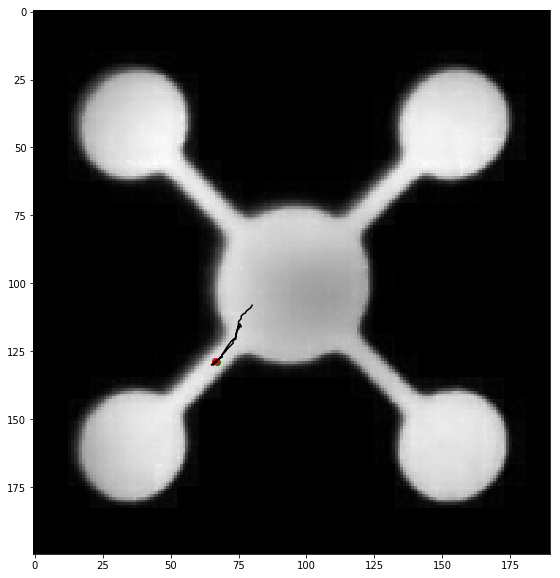

In [103]:
# TESTING
i=2
di = d[i]
center = di['center']
cx = center[0]
cy = center[1]
region_height = di['region_height']
region_width = di['region_width']
radial = di['radial']
x = di['x']
y = di['y']
radius = di['param']['radius']
outer_radius = di['param']['outer_radius']

BL, BR, TL, TR = grab_tunnel_states(center,radial,x,y,radius,outer_radius)
states = np.where(BL==1)[0]

BL, BR, TL, TR = grab_entries_traversals(center,radial,x,y,radius,outer_radius)
traversals = BL

# grab background
bg_image = d[i]['bg_image']
x1,x2 = int(cx-region_width/2), int(cx+region_width/2)
y1,y2 = int(cy-region_height/2), int(cy+region_height/2)
bg = bg_image[y1:y2,x1:x2]
fig, ax = plt.subplots(1,figsize = (10,10))
ax.imshow(bg,cmap='gray')
# shift coordinates to region bottom-left = (0,0)
x=x-(cx-region_width/2)
y=y-(cy-region_height/2)

interval = 200
s = 35200
e = s+interval
ax.plot(x[s:e],y[s:e],'k')

# ax.scatter(x[states],y[states],c='b')
traversals_starts = np.array(traversals['starts'])
index = np.where(traversals_starts>=s)[0][0]
print(traversals['starts'][index])
start = traversals['starts'][index]
end = traversals['ends'][index]
ax.scatter(x[start],y[start],c='g')
ax.scatter(x[end],y[end],c='r')

12747


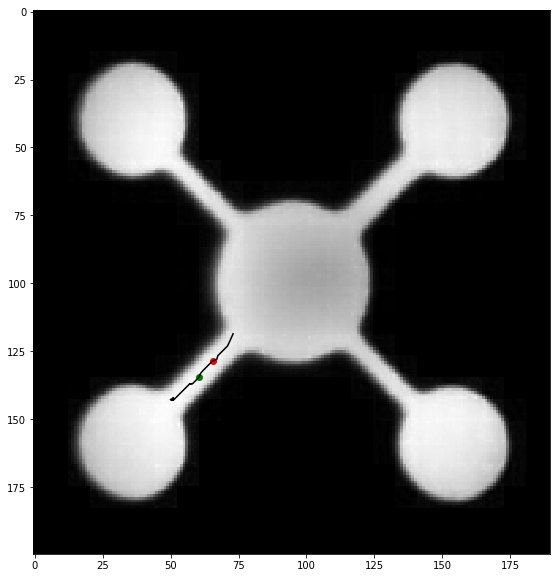

In [325]:
# TESTING
i=2
di = d[i]
center = di['center']
cx = center[0]
cy = center[1]
region_height = di['region_height']
region_width = di['region_width']
radial = di['radial']
x = di['x']
y = di['y']
radius = di['param']['radius']
outer_radius = di['param']['outer_radius']

BL, BR, TL, TR = grab_tunnel_states(center,radial,x,y,radius,outer_radius)
states = np.where(BL==1)[0]

BL, BR, TL, TR = grab_entries_traversals(center,radial,x,y,radius,outer_radius)
traversals = BL

# grab background
bg_image = d[i]['bg_image']
x1,x2 = int(cx-region_width/2), int(cx+region_width/2)
y1,y2 = int(cy-region_height/2), int(cy+region_height/2)
bg = bg_image[y1:y2,x1:x2]
fig, ax = plt.subplots(1,figsize = (10,10))
ax.imshow(bg,cmap='gray')
# shift coordinates to region bottom-left = (0,0)
x=x-(cx-region_width/2)
y=y-(cy-region_height/2)

s = 12720
e = 12760
ax.plot(x[s:e],y[s:e],'k')

# ax.scatter(x[states],y[states],c='b')
traversals_starts = np.array(traversals['starts'])
index = np.where(traversals_starts>=s)[0][0]
print(traversals['starts'][index])
start = traversals['starts'][index]
end = traversals['ends'][index]
ax.scatter(x[start],y[start],c='g')
ax.scatter(x[end],y[end],c='r')

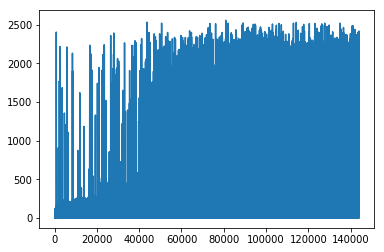

In [99]:
no = 19
no = 20
yes = 18
i=40
i=yes

x = d[i]['x']
y = d[i]['y']
dX = np.diff(x)
dY = np.diff(y)
dt = 1/d[i]['interpolation'] # data must be interpolated
velX = dX/dt
velY = dY/dt
speed = np.power(np.power(velX,2) + np.power(velY,2),0.5)
plt.plot(speed)

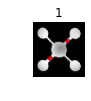

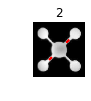

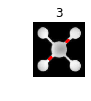

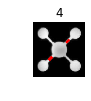

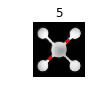

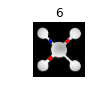

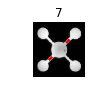

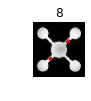

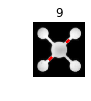

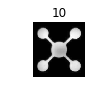

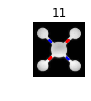

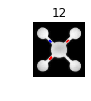

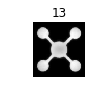

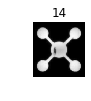

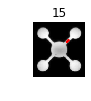

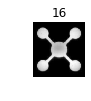

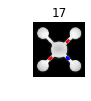

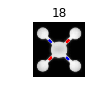

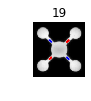

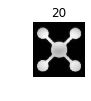

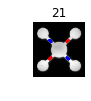

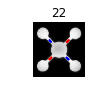

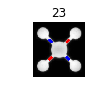

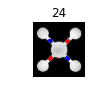

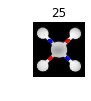

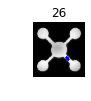

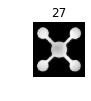

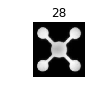

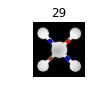

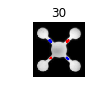

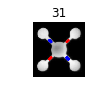

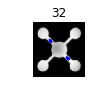

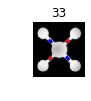

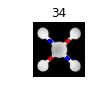

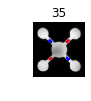

In [257]:
# PLOT x,y over bg image

bg_image = d[0]['bg_image']
# bg_image = np.flip(bg_image,axis=0)
# fig, ax = plt.subplots(1,figsize = (20,20))
# plt.imshow(bg_image,cmap='gray')

for i in d:
    di = d[i]
    x = di['x']
    y = di['y']
    radial = di['radial']
    led = di['led']
    led_mask = np.where(led==1)[0]
    
    center = di['center']
    cx = center[0]
    cy = center[1]
    region_height = di['region_height']
    region_width = di['region_width']
    radius = di['param']['radius']
    outer_radius = di['param']['outer_radius']
    
    # grab background
    x1,x2 = int(cx-region_width/2), int(cx+region_width/2)
    y1,y2 = int(cy-region_height/2), int(cy+region_height/2)
    bg = bg_image[y1:y2,x1:x2]
    
#     BL, BR, TL, TR = grab_tunnel_states(center,radial,x,y,radius,outer_radius)
#     BL, BR, TL, TR = grab_traversals(center,radial,x,y,radius,outer_radius)
    BL, BR, TL, TR = grab_entries_traversals(center,radial,x,y,radius,outer_radius)
    
#     BL_mask=np.where(BL==1)[0]
#     BR_mask=np.where(BR==1)[0]
#     TL_mask=np.where(TL==1)[0]
#     TR_mask=np.where(TR==1)[0]
#     mask = TR_mask
#     x=x[mask]
#     y=y[mask]
  
    fig, ax = plt.subplots(1,figsize = (1,1))
    ax.imshow(bg,cmap='gray')
    
    
    # shift coordinates to region bottom-left = (0,0)
    x=x-(cx-region_width/2)
    y=y-(cy-region_height/2)
    
    for start, end in zip(BL['starts'],BL['ends']):
        ax.plot(x[start:end],y[start:end],'r')
    for start, end in zip(TR['starts'],TR['ends']):
        ax.plot(x[start:end],y[start:end],'r')
    for start, end in zip(TL['starts'],TL['ends']):
        ax.plot(x[start:end],y[start:end],'b')
    for start, end in zip(BR['starts'],BR['ends']):
        ax.plot(x[start:end],y[start:end],'b')
    
#     ax.plot(x,y,'r')
    ax.axis('off')
    ax.set_title(di['arena'])

no points
no points
no points
no points
no points
no points
no points
no points
no points


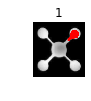

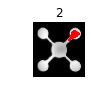

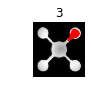

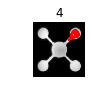

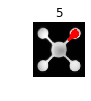

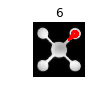

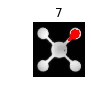

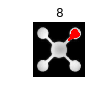

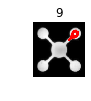

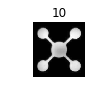

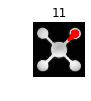

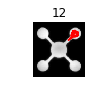

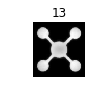

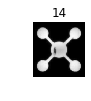

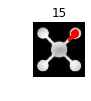

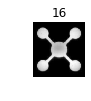

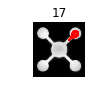

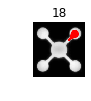

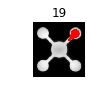

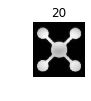

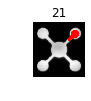

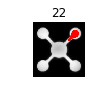

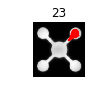

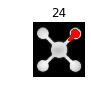

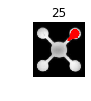

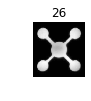

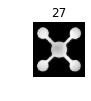

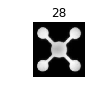

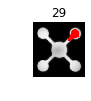

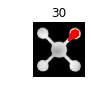

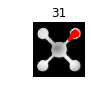

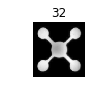

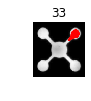

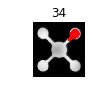

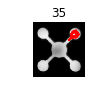

In [16]:
# PLOT x,y over bg image

bg_image = d[0]['bg_image']
# bg_image = np.flip(bg_image,axis=0)
# fig, ax = plt.subplots(1,figsize = (20,20))
# plt.imshow(bg_image,cmap='gray')

for i in d:
    di = d[i]
    x = di['x']
    y = di['y']
    radial = di['radial']
    led = di['led']
    led_mask = np.where(led==1)[0]
    
    center = di['center']
    cx = center[0]
    cy = center[1]
    region_height = di['region_height']
    region_width = di['region_width']
    radius = di['param']['radius']
    outer_radius = di['param']['outer_radius']
    
    # grab background
    x1,x2 = int(cx-region_width/2), int(cx+region_width/2)
    y1,y2 = int(cy-region_height/2), int(cy+region_height/2)
    bg = bg_image[y1:y2,x1:x2]
    
#     BL, BR, TL, TR = grab_tunnel_states(center,radial,x,y,radius,outer_radius)
    BL, BR, TL, TR = grab_tunnel_entries(center,radial,x,y,radius,outer_radius)
    BL_mask=np.where(BL==1)[0]
    BR_mask=np.where(BR==1)[0]
    TL_mask=np.where(TL==1)[0]
    TR_mask=np.where(TR==1)[0]
    mask = TR_mask
    x=x[mask]
    y=y[mask]
  
    fig, ax = plt.subplots(1,figsize = (1,1))
    ax.imshow(bg,cmap='gray')
    
    
    # shift coordinates to region bottom-left = (0,0)
    x=x-(cx-region_width/2)
    y=y-(cy-region_height/2)
    #     ax.plot(x[mask],y[mask],'r')
    ax.plot(x,y,'r')
    ax.axis('off')
    

    ax.set_title(di['arena'])

In [57]:
print(test.keys())

dict_keys(['outer_radius', 'tunnels', 'radius'])


In [137]:
def grab_entries(center,radial,x,y,radius,outer_radius):
    
    # any time the fly goes into the tunnel from at least a distance (threshold) away
    threshold = 5 # (in radial pixels) fly must retreat this far from tunnel threshold to be considered a new entry
    
    # for 45˚ tunnels, quadrant determines tunnel ID
    tunnel_to_sign = {
        'TR'     : ( 1.0, -1.0),
        'TL'      : (-1.0, -1.0),
        'BR'  : ( 1.0,  1.0),
        'BL'   : (-1.0,  1.0),
        }

    # initialize array of indices for each extremity
    BL_indices=[]# bottom left
    BR_indices=[] # bottom right
    TL_indices=[] # top left
    TR_indices=[] # top right
    
    not_tunneled = np.where((radial<radius-threshold) | (radial>outer_radius+threshold))[0] # fly is not in tunnel, by at least threshold
    tunneled = np.where((radial<outer_radius) & (radial>radius))[0] # fly is in tunnel
    for t in tunneled:
        sx = np.sign(x[t]-cx)
        sy = np.sign(y[t]-cy)
        signs = (sx,sy)
        for key, value in tunnel_to_sign.items():
            if value == signs:
                tunnel = key
                if tunnel=='BR':
                    BR_indices.append(t)
                elif tunnel=='TR':  
                    TR_indices.append(t)
                elif tunnel=='BL':
                    BL_indices.append(t)
                elif tunnel=='TL': 
                    TL_indices.append(t)
                break
    
    def count_traversals(tunnel_i):
        starts=[]
        ends=[]
        if len(tunnel_i)==0:
            return starts, ends
        tunnel_epochs = np.split(tunnel_i, np.where(np.diff(tunnel_i) != 1)[0]+1) # separate indices into consecutive chunks
        if tunnel_i[0]==0: # ignore first epoch if fly started in tunnel
            tunnel_epochs = np.delete(tunnel_epochs,0)
        for e in tunnel_epochs:
            # check if fly was in not_tunnel before, and is in not_tunnel after
            if len(np.where(not_tunneled<e[0])[0]>0) and len(np.where(not_tunneled>e[-1])[0]>0):
                starts.append(e[0])
                ends.append(e[-1])
        return starts, ends
            
    BL, BR, TL, TR = {},{},{},{}
    BL['starts'], BL['ends'] = count_traversals(BL_indices)
    BR['starts'], BR['ends'] = count_traversals(BR_indices)
    TL['starts'], TL['ends'] = count_traversals(TL_indices)
    TR['starts'], TR['ends'] = count_traversals(TR_indices)
    
    return BL, BR, TL, TR

(-7200.0, 151200.0, -0.05, 1.05)

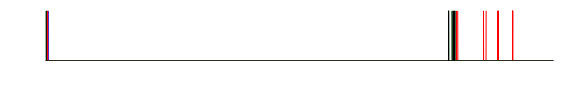

In [42]:
fig, ax = plt.subplots(1, figsize = (10,1))
ax.plot(BL,'b',linewidth=0.5)
ax.plot(BR,'r',linewidth=0.5)
ax.plot(TL,'g',linewidth=0.5)
ax.plot(TL,'k',linewidth=0.5)
ax.axis('off')

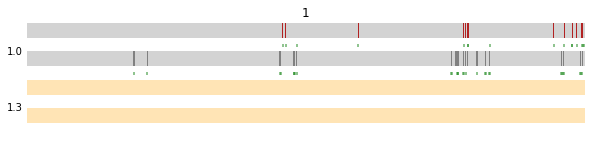

In [258]:
# PLOT tunnel states
extension=200
def extend_marks(mask,extension=200):
        tunneled = np.where(mask==1)[0]
        for t in tunneled:
            mask[t:t+extension]=1
        return mask

for i in d:
    
    di = d[i]
    center = di['center']
    cx = center[0]
    cy = center[1]
    radial = di['radial']
    x = di['x']
    y = di['y']
    radius = di['param']['radius']
    outer_radius = di['param']['outer_radius']
    
    if len(x)==0:
        continue
    
    BL, BR, TL, TR = grab_tunnel_states(center,radial,x,y,radius,outer_radius)
    
    # extend marks graphically (default is 5 sec)
    BL = extend_marks(BL)
    BR = extend_marks(BR)
    TL = extend_marks(TL)
    TR = extend_marks(TR)
    
    fig, ax = plt.subplots(4,figsize = (10,2))
    # plot standard width tunnel, reinforced
    hmap = [TR]
    cmap = custom_colormap_2('lightgrey',activation_color)
    ax[0].imshow(hmap,cmap=cmap,vmin=0,vmax=1,aspect='auto')
    ax[0].axis('off')
    
    # plot standard width tunnel, not reinforced
    hmap = [BL]
    cmap = custom_colormap_2('lightgrey','grey')
    ax[1].imshow(hmap,cmap=cmap,vmin=0,vmax=1,aspect='auto')
    ax[1].axis('off')
    
    # plot variable width tunnel, reinforced
    hmap = [BR]
    cmap = custom_colormap_2('moccasin',activation_color)
    ax[2].imshow(hmap,cmap=cmap,vmin=0,vmax=1,aspect='auto')
    ax[2].axis('off')
    
    # plot variable width tunnel, not reinforced
    hmap = [TL]
    cmap = custom_colormap_2('moccasin','grey')
    ax[3].imshow(hmap,cmap=cmap,vmin=0,vmax=1,aspect='auto')
    ax[3].axis('off')

    # annotate tunnel width
    width = str(d[i]['BR'])
    ax[1].text(-5000,-0.3,width)    
    width = str(d[i]['TR'])
    ax[3].text(-5000,-0.3,width)

    ax[0].set_title(di['arena'])
    
    # plot tunnel traversals or entries
    BL, BR, TL, TR = grab_entries_traversals(center,radial,x,y,radius,outer_radius)
    ax[0].plot([0,len(radial)],[1,1],'grey',alpha=0)
    ax[1].plot([0,len(radial)],[1,1],'grey',alpha=0)
    ax[2].plot([0,len(radial)],[1,1],'grey',alpha=0)
    ax[3].plot([0,len(radial)],[1,1],'grey',alpha=0)
    
    
#     mask = np.zeros(len(radial))
#     mask[TR_array]=1
#     ax[0].plot(mask)
    for start, end in zip(TR['starts'],TR['ends']):
        ax[0].plot([start,start+extension],[1,1],'forestgreen',linewidth=5,solid_capstyle="butt")
    
    for start, end in zip(BL['starts'],BL['ends']):
        ax[1].plot([start,start+extension],[1,1],'forestgreen',linewidth=5,solid_capstyle="butt")
    
    for start, end in zip(BR['starts'],BR['ends']):
        ax[2].plot([start,start+extension],[1,1],'forestgreen',linewidth=5,solid_capstyle="butt")
    
    for start, end in zip(TL['starts'],TL['ends']):
        ax[3].plot([start,start+extension],[1,1],'forestgreen',linewidth=5,solid_capstyle="butt")
    
    break
    

In [8]:
# DEF get state array for each tunnel
def tunnel_states(puzzle,x,y,center,radial):
    
    # temporarily hard coded, but should parse puzzle['param']
    radius = 17
    outer_radius = 22
    
    BL=np.zeros(len(radial)) # bottom left
    BR=np.zeros(len(radial)) # bottom right
    TL=np.zeros(len(radial)) # top left
    TR=np.zeros(len(radial)) # top right
    
    tunneled = np.where((radial<outer_radius) & (radial>radius))[0]
    
    for t in tunneled:
        if x[t]>center[0]:
            if y[t]>center[1]:
                BR[t]=1
            else:
                TR[t]=1
        elif y[t]>center[1]:
            BL[t]=1
        else:
            TL[t]=1
        
    return BL, BR, TL, TR 

In [9]:
# DEF get tunnel entries for each tunnel
def tunnel_entries(BL, BR, TL, TR, radial):
    
    BLe=np.zeros(len(radial)) # bottom left
    BRe=np.zeros(len(radial)) # bottom right
    TLe=np.zeros(len(radial)) # top left
    TRe=np.zeros(len(radial)) # top right
    
    for t in BLe:
        pass
    
    return BLe, BRe, TLe, TRe

In [10]:
# get state array for each tunnel
for i in d:
    a = d[i]
    puzzle=yaml.load(a['classifier_type'])
    x = a['x']
    y = a['y']
    radial = a['radial']
    center = a['center']
    BL, BR, TL, TR = tunnel_states(puzzle,x,y,center,radial)
    d[i]['BL']=BL
    d[i]['BR']=BR
    d[i]['TL']=TL
    d[i]['TR']=TR

In [57]:
plots=len(d)
fig = plt.figure( figsize = (6,plots/2))
subplot = 0
for i in d:
    subplot += 1
    ax = fig.add_subplot(plots,1,subplot)
    try:
        ax.plot(d[i]['classifier'],'r')
        plt.ylim(0.9,1.1)
#         plt.xlim(0,d[i]['elapsed_t'][-1])
    #     ax.invert_yaxis()
        ax.axis('off')
        ax.text(len(d[i]['classifier']),0.9,str(d[i]['arena']),size=10, clip_on=False)
    except:
        ax.axis('off')

ValueError: Image size of 608727490x959 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x1224 with 35 Axes>

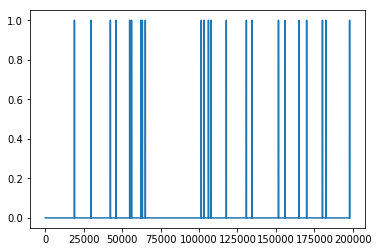

In [56]:
plt.plot(d[1]['classifier'])

(262.0, 261.0)


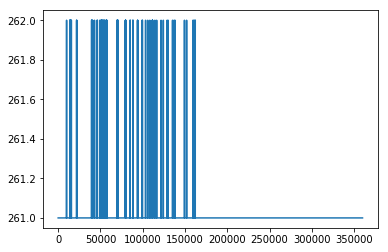

In [46]:
a=d[8]['x']
plt.plot(a)
print(max(a),min(a))

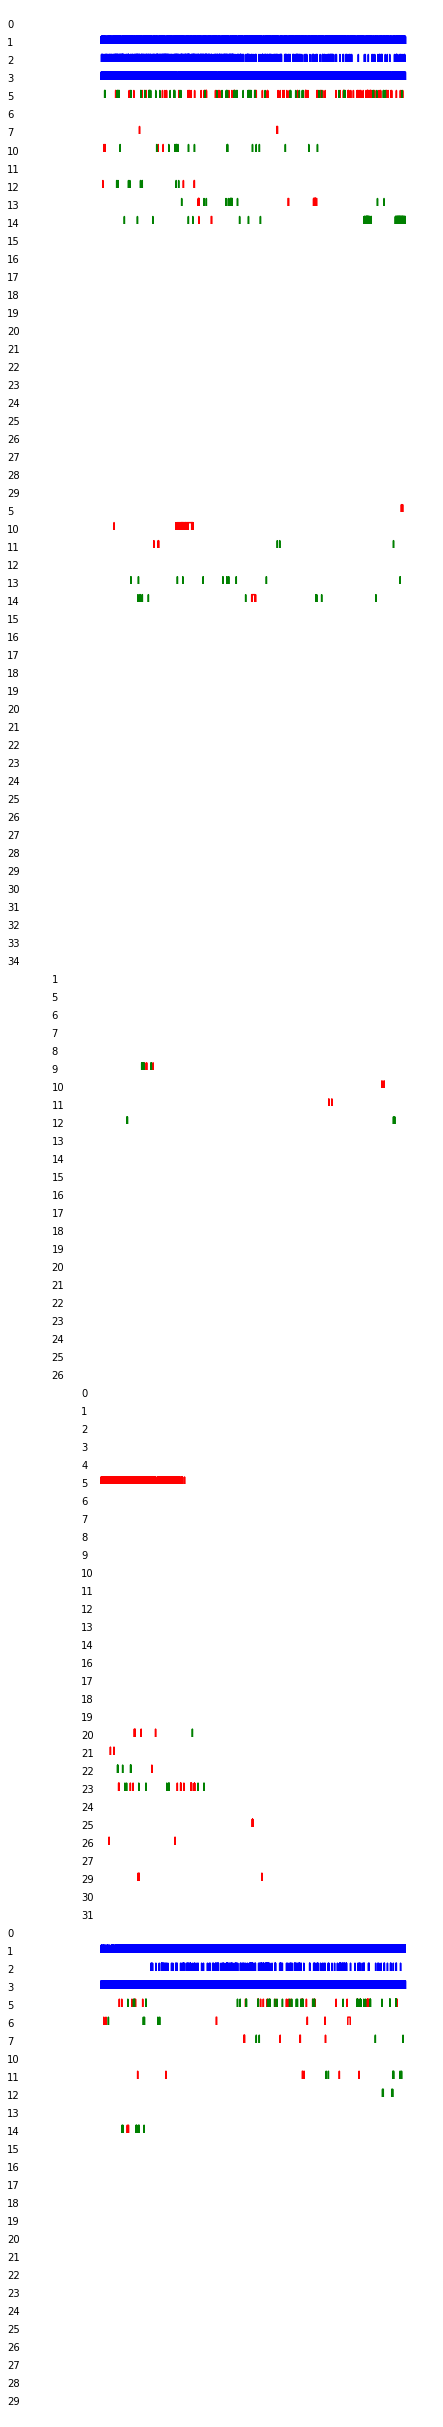

In [39]:
plots=len(d)
fig = plt.figure( figsize = (6,plots/3))
subplot = 0
for i in d:
    subplot += 1
    ax = fig.add_subplot(plots,1,subplot)
    BL, BR, TL, TR = d[i]['BL'], d[i]['BR'], d[i]['TL'], d[i]['TR']
#     BLe, BRe, TLe, TRe = tunnel_entries(BL, BR, TL, TR, radial)
    ax.plot(d[i]['elapsed_t'],BR,c='r')
    ax.plot(d[i]['elapsed_t'],TL,c='g')
    ax.plot(d[i]['elapsed_t'],TR,c='b')
    ax.plot(d[i]['elapsed_t'],BL,c='b')
    plt.ylim(0.9,1.1)
    ax.axis('off')
    ax.text(-3700,0.87,str(d[i]['arena']),size=10)
    

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 1)
('wide (TL):', 0)
('reinforced narrow (TR):', 10696)
('narrow (BL):', 1)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 718)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 345794)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 770)
('wide (TL):', 361)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 1101)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL)

('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)

('reinforced wide (BR):', 0)
('wide (TL):', 0)
('reinforced narrow (TR):', 0)
('narrow (BL):', 0)



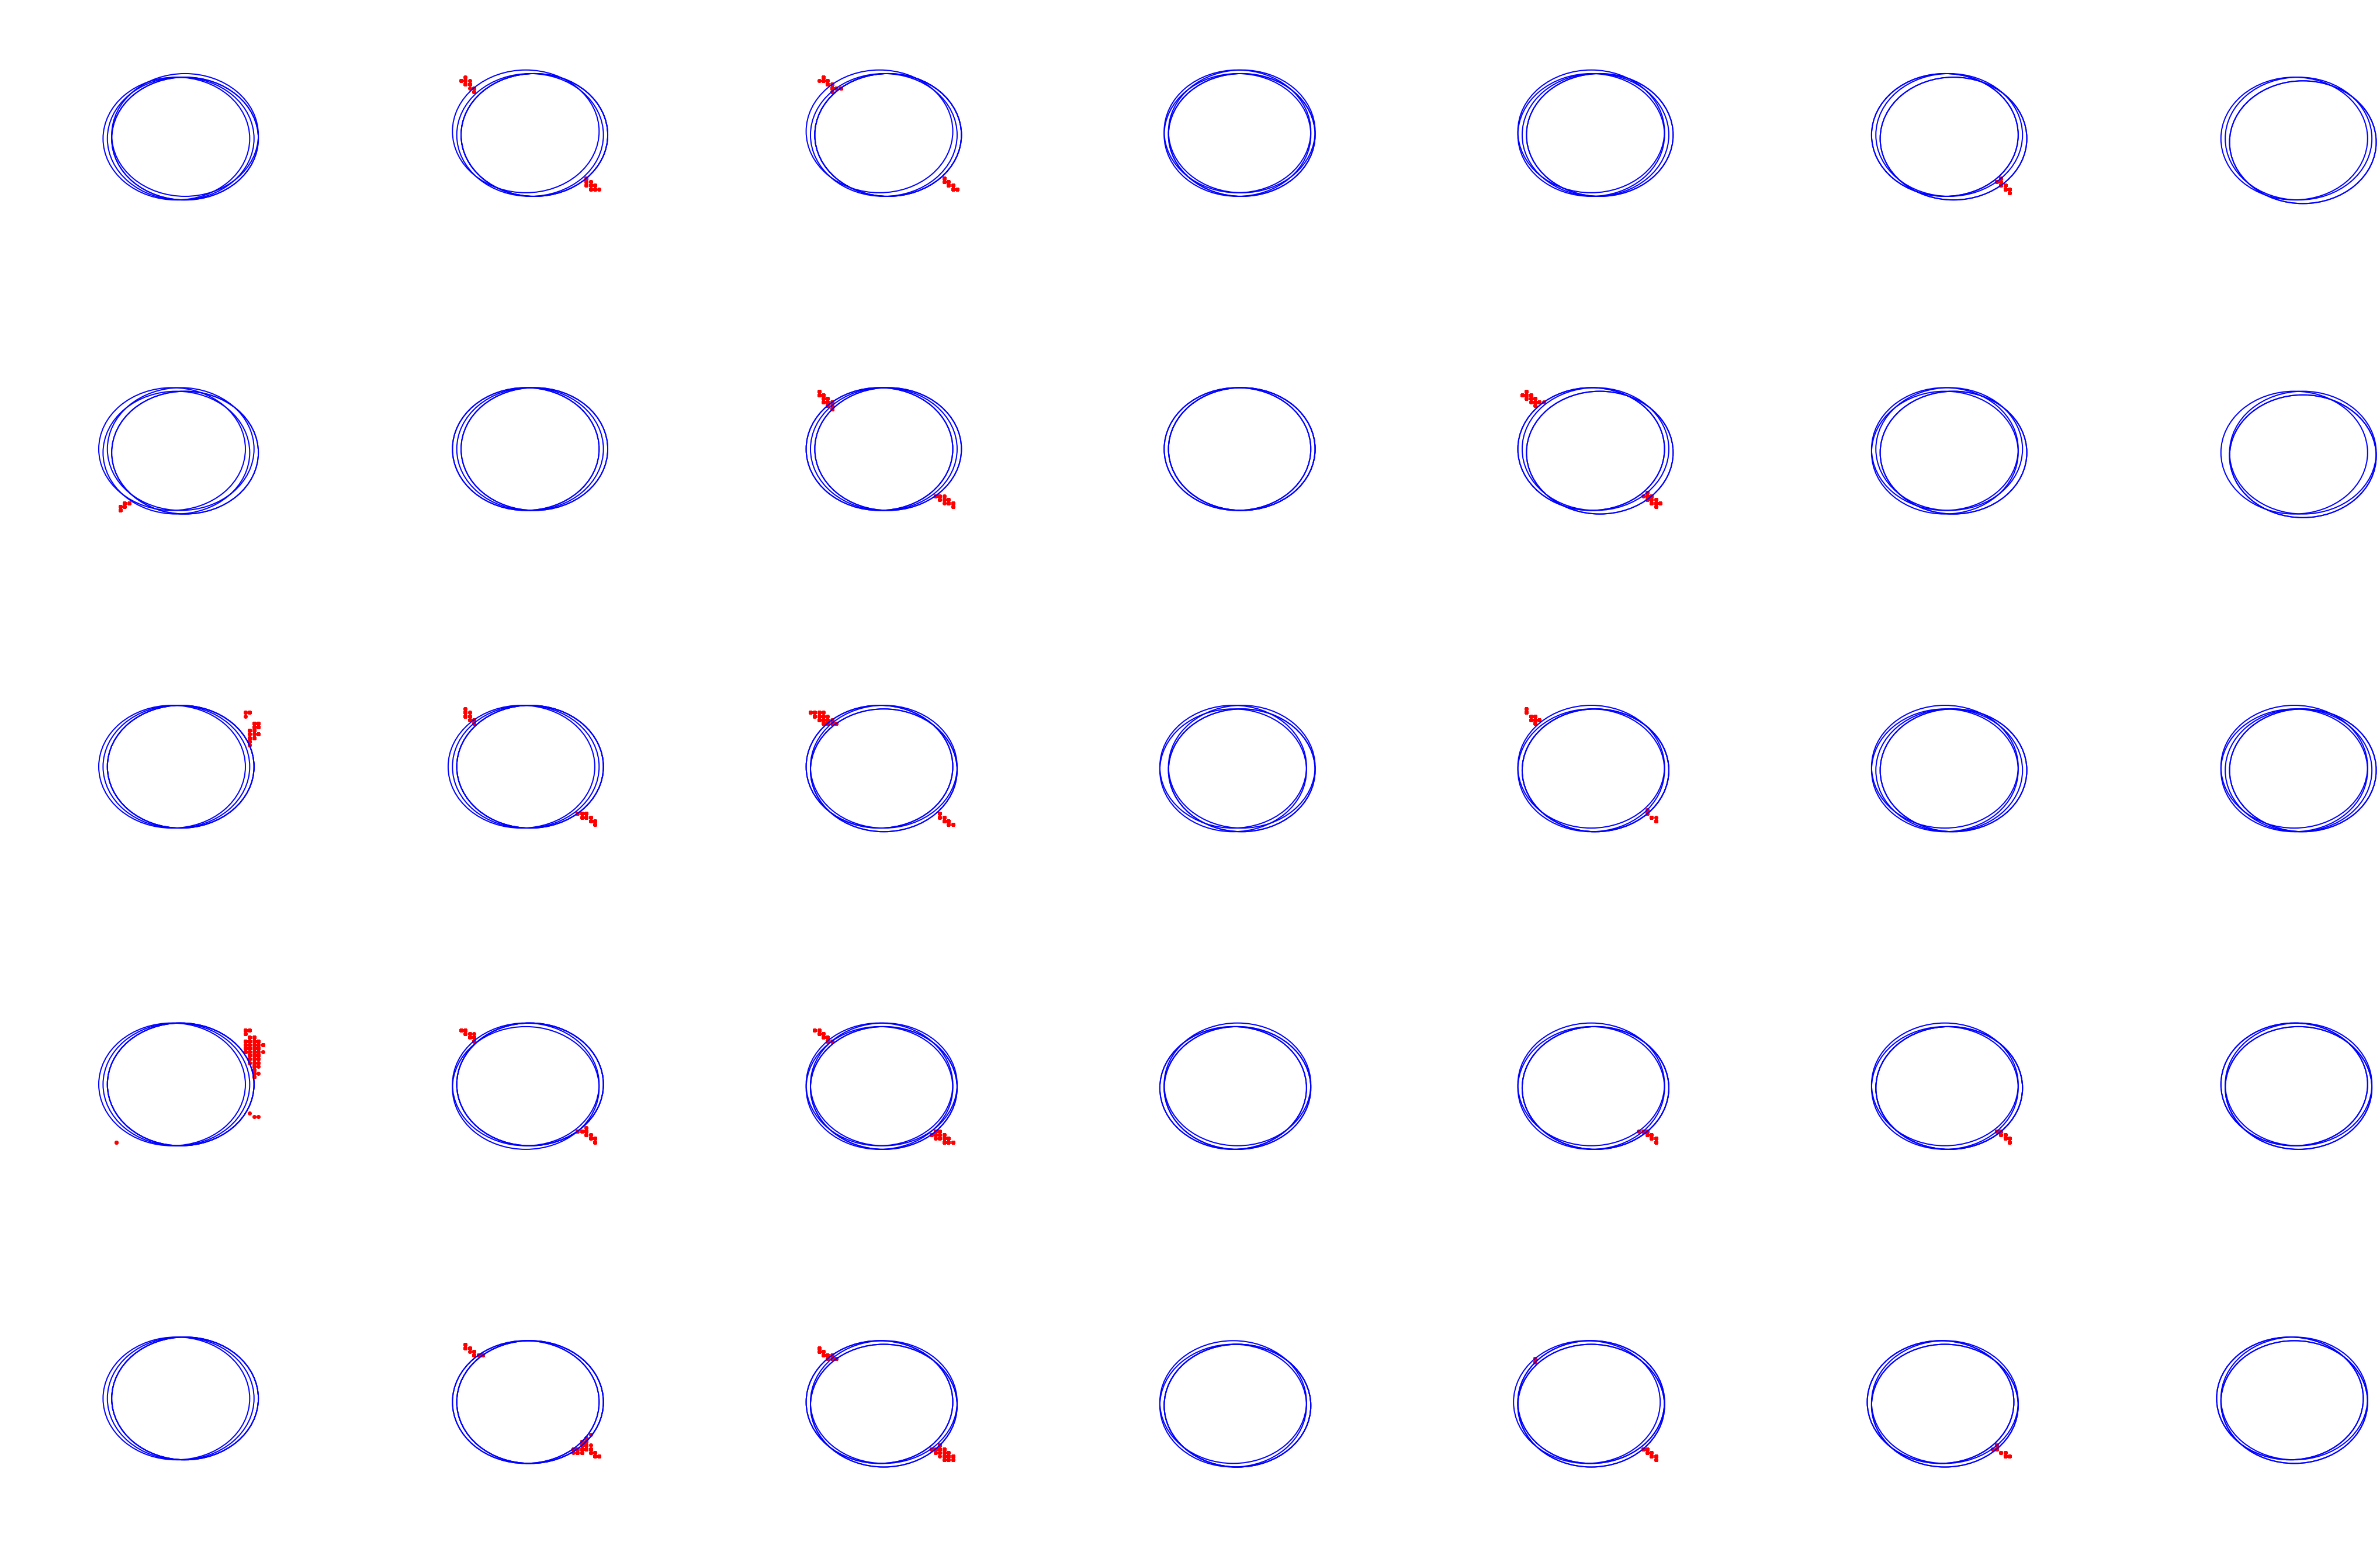

In [21]:
fig = plt.figure( figsize = (64,48))
ax = fig.add_subplot(111)
for i in d:
    a = d[i] # arena data
    puzzle=json.loads(a['classifier_type'])
    x = a['x']
    y = a['y']
    radial = a['radial']
    center = a['center']
    BL, BR, TL, TR = tunnel_states(puzzle,x,y,center,radial)
    print('reinforced wide (BR):',int(sum(BR)))
    print('wide (TL):',int(sum(TL)))
    print('reinforced narrow (TR):',int(sum(TR)))
    print('narrow (BL):',int(sum(BL)))
    print('')
    mask=np.where(BR)[0]
    ax.scatter(x[mask],y[mask],c='r')
    mask=np.where(TR)[0]
    ax.scatter(x[mask],y[mask],c='r')
    mask=np.where(BL)[0]
    ax.scatter(x[mask],y[mask],c='r')
    mask=np.where(TL)[0]
    ax.scatter(x[mask],y[mask],c='r')
    arena = plt.Circle((center[0],center[1]),17, color='b', linewidth=2, fill=False, clip_on=False)
    ax.add_artist(arena)
    ax.invert_yaxis()
    ax.axis('off')
    

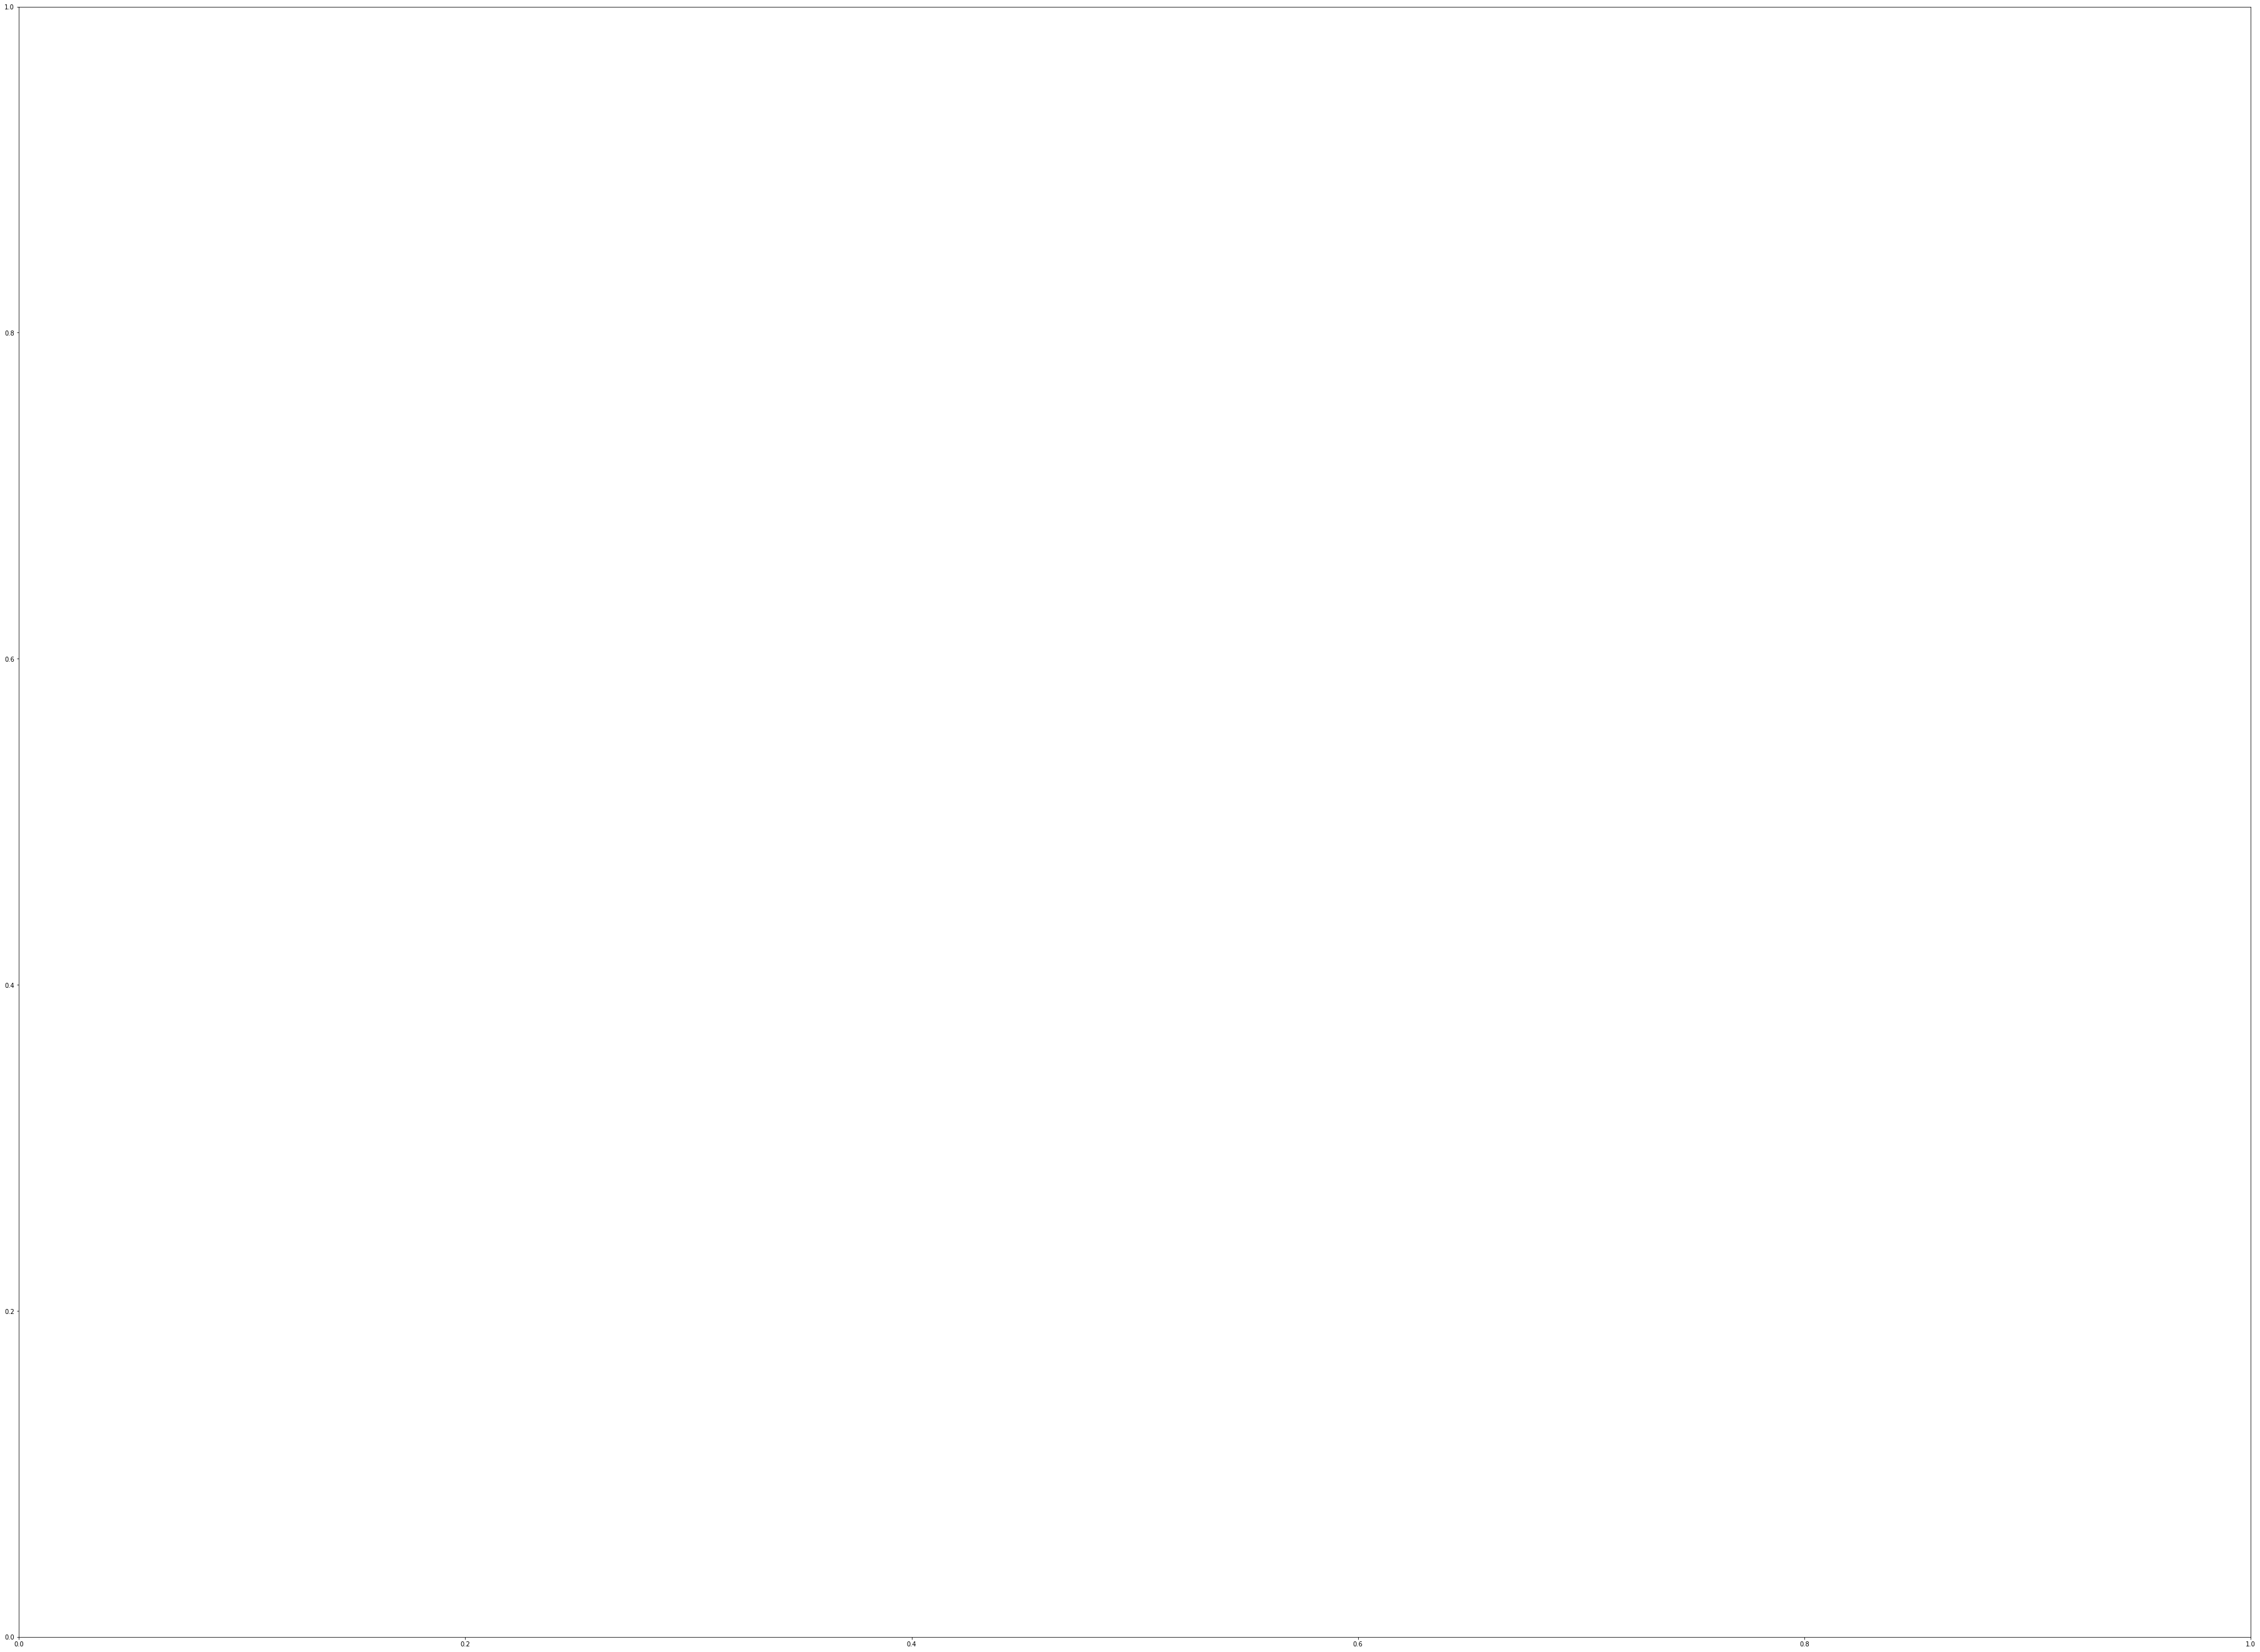

In [28]:
fig = plt.figure( figsize = (64,48))
ax = fig.add_subplot(111)
for i in d: # trials
    for j in d[i]['indices']: # arenas
        puzzle=json.loads(d[i]['classifier_type'][j])
        if puzzle['type']=='tunnels':
            x = d[i]['x'][j]
            y = d[i]['y'][j]
            radial = d[i]['radial'][j]
            center = d[i]['center'][j]
            BL, BR, TL, TR = tunnel_states(puzzle,x,y,center,radial)
#             print('reinforced wide:',int(sum(BR)))
#             print('wide:',int(sum(TL)))
#             print('reinforced narrow:',int(sum(TR)))
#             print('narrow:',int(sum(BL)))
#             print('')
            mask=np.where(BR)[0]
#             ax.scatter(x[mask],y[mask],c='r')
            arena = plt.Circle((center[0],center[1]),17, color='r', linewidth=2)
            ax.add_artist(arena)
            

In [64]:
puzzle=json.loads(data['classifier_type'][0])
print(puzzle['type'])
print(puzzle['param'])

tunnels
{radius: 17, outer_radius: 22, tunnels: [top_right, bottom_right]}


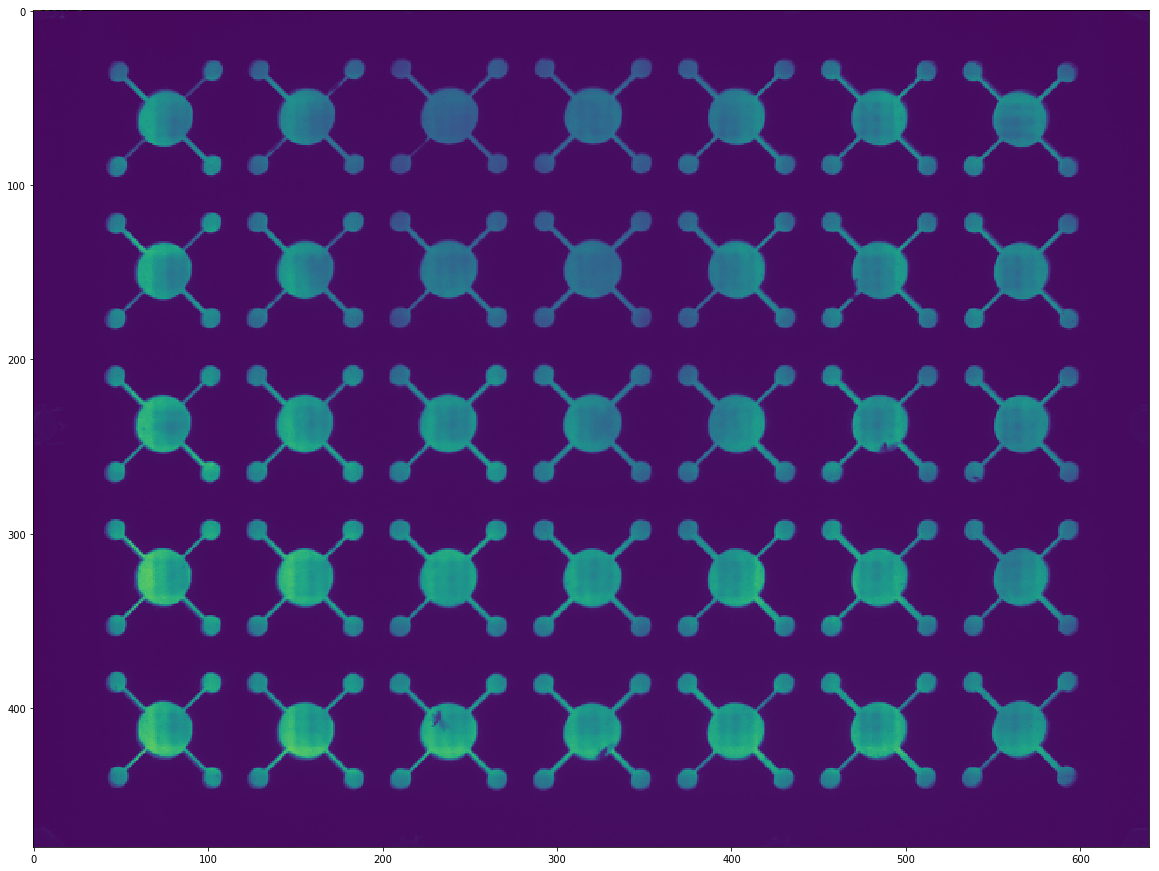

In [65]:
fig = plt.figure( figsize = (20,20))
plt.imshow(d['bg_image'][0])

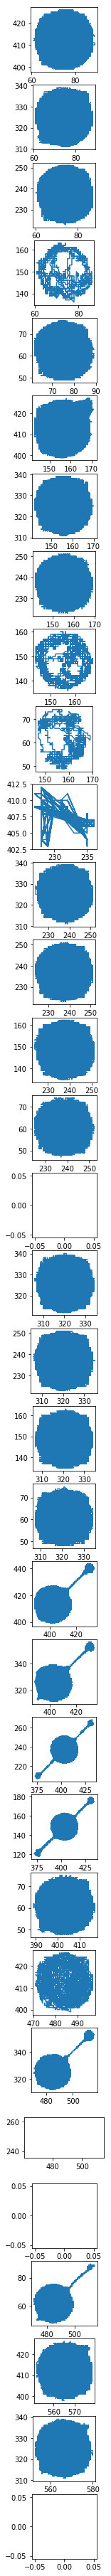

In [66]:
# plot each xy
plots=len(data['arena'])
fig = plt.figure( figsize = (2,2*plots))
subplot = 0
for arena in data['arena']:
    subplot += 1
    ax = fig.add_subplot(plots,1,subplot, aspect='equal')

    indices = data['indices'][arena]
    
    x = data['x'][arena][indices]
    y = data['y'][arena][indices]
    ax.plot(x,y)

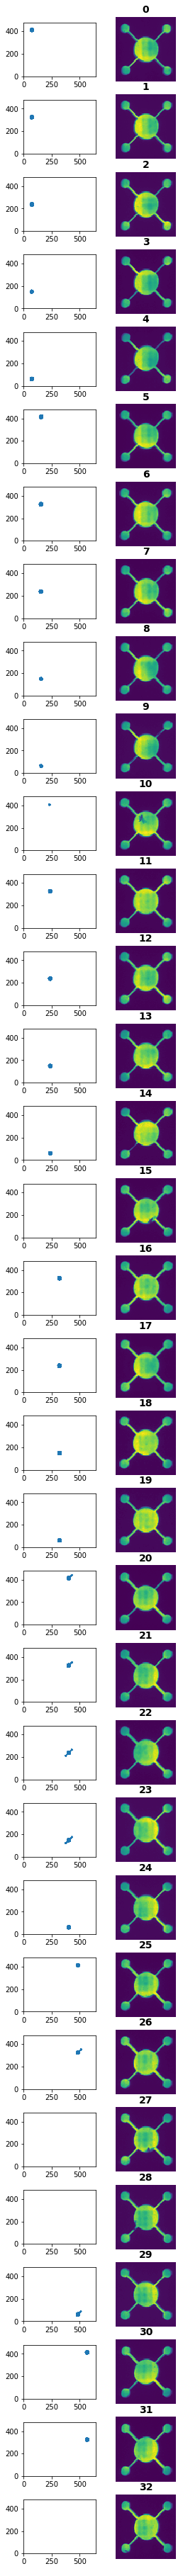

In [67]:
# plot xy and bg img
plots=len(data['arena'])
fig = plt.figure( figsize = (4,2*plots))
subplot = 0
for arena in data['arena']:
    
    h = data['region_height'][arena]
    w = data['region_width'][arena]
    c = data['center'][arena]
    roiX1 = c[1]-h/2
    roiX2 = c[1]+h/2
    roiY1 = c[0]-w/2
    roiY2 = c[0]+w/2
    
    subplot += 1
    ax = fig.add_subplot(plots,2,subplot, aspect='equal')
#     plt.axis('off')
    
    indices = data['indices'][arena]

    x = data['x'][arena][indices]
    y = data['y'][arena][indices]
    ax.plot(x,y)
    plt.ylim(0,480)
    plt.xlim(0,640)
#     plt.xlim(roiX1,roiX2)
#     plt.ylim(roiY1,roiY2)
    
    subplot += 1
    ax = fig.add_subplot(plots,2,subplot, aspect='equal')
    plt.axis('off')
    
    img = data['bg_image'][arena][roiX1:roiX2,roiY1:roiY2]
    ax.imshow(img)
    
    ax.set_title(str(arena), fontsize=14, fontweight='bold')

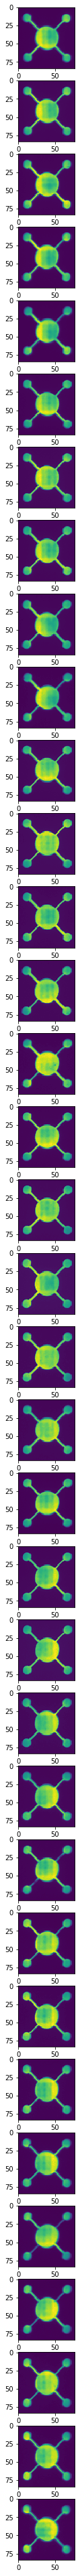

In [10]:
# plot arena bg images
plots=len(data['arena'])
fig = plt.figure( figsize = (2,2*plots))
subplot = 0
for arena in data['arena']:
    subplot += 1
    ax = fig.add_subplot(plots,1,subplot, aspect='equal')
    
    h = data['region_height'][arena]
    w = data['region_width'][arena]
    c = data['center'][arena]
    img = data['bg_image'][arena][c[1]-h/2:c[1]+h/2,c[0]-w/2:c[0]+w/2]
    ax.imshow(img)